# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1 toc-item"><a href="#Network-Visualisation" data-toc-modified-id="Network-Visualisation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Network Visualisation</a></div><div class="lev2 toc-item"><a href="#Yearly-Networks" data-toc-modified-id="Yearly-Networks-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Yearly Networks</a></div><div class="lev2 toc-item"><a href="#Monthly-networks" data-toc-modified-id="Monthly-networks-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Monthly networks</a></div><div class="lev1 toc-item"><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Analysis</a></div><div class="lev2 toc-item"><a href="#Yearly-Networks" data-toc-modified-id="Yearly-Networks-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Yearly Networks</a></div><div class="lev2 toc-item"><a href="#Monthly-Networks" data-toc-modified-id="Monthly-Networks-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Monthly Networks</a></div><div class="lev1 toc-item"><a href="#Attribute-Analysis" data-toc-modified-id="Attribute-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Attribute Analysis</a></div><div class="lev2 toc-item"><a href="#Traditional-Measures" data-toc-modified-id="Traditional-Measures-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Traditional Measures</a></div><div class="lev3 toc-item"><a href="#Centrality" data-toc-modified-id="Centrality-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Centrality</a></div><div class="lev3 toc-item"><a href="#Assortativity-&amp;-Linear-Algebra" data-toc-modified-id="Assortativity-&amp;-Linear-Algebra-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Assortativity &amp; Linear Algebra</a></div><div class="lev2 toc-item"><a href="#Complex-Trace-Attributes" data-toc-modified-id="Complex-Trace-Attributes-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Complex Trace Attributes</a></div><div class="lev2 toc-item"><a href="#Matrix" data-toc-modified-id="Matrix-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Matrix</a></div><div class="lev2 toc-item"><a href="#Matrix-Decomposition" data-toc-modified-id="Matrix-Decomposition-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Matrix Decomposition</a></div><div class="lev2 toc-item"><a href="#Music-Attributes" data-toc-modified-id="Music-Attributes-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Music Attributes</a></div><div class="lev2 toc-item"><a href="#Aggregation-Measures" data-toc-modified-id="Aggregation-Measures-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Aggregation Measures</a></div><div class="lev1 toc-item"><a href="#Overview-Plots" data-toc-modified-id="Overview-Plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Overview Plots</a></div><div class="lev1 toc-item"><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlation Analysis</a></div><div class="lev2 toc-item"><a href="#Correlation-&gt;-0.7" data-toc-modified-id="Correlation->-0.7-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Correlation &gt; 0.7</a></div><div class="lev1 toc-item"><a href="#Regression-Analysis-for-Feature-Ranking" data-toc-modified-id="Regression-Analysis-for-Feature-Ranking-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Regression Analysis for Feature Ranking</a></div><div class="lev1 toc-item"><a href="#Aggregation-Measures" data-toc-modified-id="Aggregation-Measures-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Aggregation Measures</a></div><div class="lev1 toc-item"><a href="#MDS-and-TSNE" data-toc-modified-id="MDS-and-TSNE-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>MDS and TSNE</a></div><div class="lev1 toc-item"><a href="#FK-and-Radon-Plot" data-toc-modified-id="FK-and-Radon-Plot-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>FK and Radon Plot</a></div><div class="lev1 toc-item"><a href="#Exotic-Transforms" data-toc-modified-id="Exotic-Transforms-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Exotic Transforms</a></div><div class="lev1 toc-item"><a href="#Which-nodes-are-common-to-all-years?" data-toc-modified-id="Which-nodes-are-common-to-all-years?-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Which nodes are common to all years?</a></div>

# Introduction

Dynamic Network Analysis of Enron Email Network Data.

I use the Enron email network data from [John Hopkins](http://cis.jhu.edu/~parky/Enron/enron.html) which has time, sender and receiver pair format data.

Here I consolidate earlier analysis to make presentation of the final results easier and more readable.

From the JHU data, I have done the following in Excel:
- The first column represents seconds elapsed since 1 January 1970, so I convert this in to days
- I then add these days to the date to get time stamps for all nodes
- From the timestamps, I extract the year field
- The network can be partitioned by the required level of granularity

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import scipy as sc
import random
from scipy.signal import *
from numpy.linalg import *
from sklearn.decomposition import *
from sklearn.preprocessing import *
import librosa
import abel
#plotting parameters
%matplotlib inline
sns.set(style="whitegrid", color_codes=True, context='paper')

In [221]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['CMU Serif']

In [3]:
import matplotlib.pyplot as plt

In [222]:
plt.rc('axes', grid=False, titlesize='large', labelsize='medium',labelweight='heavy')
plt.rc('lines', linewidth=4)
plt.rc('figure', figsize = (8,6),titlesize='large',titleweight='black')
plt.rc('font', weight='medium', size=9)
plt.rc('grid',linewidth=3)

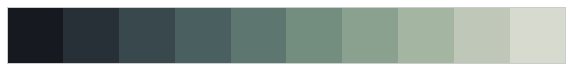

In [5]:
sns.palplot(sns.cubehelix_palette(10,hue=0.3, reverse=True, rot=-0.55, dark=0.1))

In [6]:
sns.set_palette(sns.cubehelix_palette(10, hue=0.3, reverse=True, rot=-0.55, dark=0.1))

In [7]:
data = pd.read_excel("../Data/data 03.2.xlsx")

In [8]:
years = sorted(set(data.year))
years = years[1:]
years

[1998, 1999, 2000, 2001, 2002]

In [9]:
months = ['Nov98', 'Dec98', 'jan_99', 'feb_99', 'mar_99', 'apr_99', 'may_99', 'jun_99', 'jul_99', 'aug_99', 'sep_99', 'oct_99',\
          'nov_99', 'dec_99', 'jan_2k', 'feb_2k', 'mar_2k', 'apr_2k', 'may_2k', 'jun_2k', 'jul_2k', 'aug_2k', 'sep_2k', 'oct_2k',\
          'nov_2k', 'dec_2k', 'jan_2k1', 'feb_2k1', 'mar_2k1', 'apr_2k1', 'may_2k1', 'jun_2k1', 'jul_2k1', 'aug_2k1', 'sep_2k1',\
          'oct_2k1', 'nov_2k1', 'dec_2k1', 'jan_2k2', 'feb_2k2', 'mar_2k2', 'apr_2k2', 'may_2k2', 'jun_2k2']

In [10]:
df_98 = data[data.year==years[0]]
df_99 = data[data.year==years[1]]
df_2k = data[data.year==years[2]]
df_2k1 = data[data.year==years[3]]
df_2k2 = data[data.year==years[4]]

In [11]:
def create_graph(df):
    tmp = df.values[:,1:3]
    G= nx.Graph()
    G = nx.from_edgelist(tmp)
    
    return G

In [12]:
Gt0 = create_graph(df_98)
Gt1 = create_graph(df_99)
Gt2 = create_graph(df_2k)
Gt3 = create_graph(df_2k1)
Gt4 = create_graph(df_2k2)

In [13]:
nov_98 = df_98[df_98.month==11]
dec_98= df_98[df_98.month==12]

G_nov98 = create_graph(nov_98)
G_dec98 = create_graph(dec_98)

In [14]:
jan_99=df_99[df_99.month==1]
feb_99=df_99[df_99.month==2]
mar_99=df_99[df_99.month==3]
apr_99=df_99[df_99.month==4]
may_99=df_99[df_99.month==5]
jun_99=df_99[df_99.month==6]
jul_99=df_99[df_99.month==7]
aug_99=df_99[df_99.month==8]
sep_99=df_99[df_99.month==9]
oct_99=df_99[df_99.month==10]
nov_99=df_99[df_99.month==11]
dec_99=df_99[df_99.month==12]


G_jan_99=create_graph(jan_99)
G_feb_99=create_graph(feb_99)
G_mar_99=create_graph(mar_99)
G_apr_99=create_graph(apr_99)
G_may_99=create_graph(may_99)
G_jun_99=create_graph(jun_99)
G_jul_99=create_graph(jul_99)
G_aug_99=create_graph(aug_99)
G_sep_99=create_graph(sep_99)
G_oct_99=create_graph(oct_99)
G_nov_99=create_graph(nov_99)
G_dec_99=create_graph(dec_99)

In [15]:
jan_2k=df_2k[df_2k.month==1]
feb_2k=df_2k[df_2k.month==2]
mar_2k=df_2k[df_2k.month==3]
apr_2k=df_2k[df_2k.month==4]
may_2k=df_2k[df_2k.month==5]
jun_2k=df_2k[df_2k.month==6]
jul_2k=df_2k[df_2k.month==7]
aug_2k=df_2k[df_2k.month==8]
sep_2k=df_2k[df_2k.month==9]
oct_2k=df_2k[df_2k.month==10]
nov_2k=df_2k[df_2k.month==11]
dec_2k=df_2k[df_2k.month==12]


G_jan_2k=create_graph(jan_2k)
G_feb_2k=create_graph(feb_2k)
G_mar_2k=create_graph(mar_2k)
G_apr_2k=create_graph(apr_2k)
G_may_2k=create_graph(may_2k)
G_jun_2k=create_graph(jun_2k)
G_jul_2k=create_graph(jul_2k)
G_aug_2k=create_graph(aug_2k)
G_sep_2k=create_graph(sep_2k)
G_oct_2k=create_graph(oct_2k)
G_nov_2k=create_graph(nov_2k)
G_dec_2k=create_graph(dec_2k)

In [16]:
jan_2k1=df_2k1[df_2k1.month==1]
feb_2k1=df_2k1[df_2k1.month==2]
mar_2k1=df_2k1[df_2k1.month==3]
apr_2k1=df_2k1[df_2k1.month==4]
may_2k1=df_2k1[df_2k1.month==5]
jun_2k1=df_2k1[df_2k1.month==6]
jul_2k1=df_2k1[df_2k1.month==7]
aug_2k1=df_2k1[df_2k1.month==8]
sep_2k1=df_2k1[df_2k1.month==9]
oct_2k1=df_2k1[df_2k1.month==10]
nov_2k1=df_2k1[df_2k1.month==11]
dec_2k1=df_2k1[df_2k1.month==12]


G_jan_2k1=create_graph(jan_2k1)
G_feb_2k1=create_graph(feb_2k1)
G_mar_2k1=create_graph(mar_2k1)
G_apr_2k1=create_graph(apr_2k1)
G_may_2k1=create_graph(may_2k1)
G_jun_2k1=create_graph(jun_2k1)
G_jul_2k1=create_graph(jul_2k1)
G_aug_2k1=create_graph(aug_2k1)
G_sep_2k1=create_graph(sep_2k1)
G_oct_2k1=create_graph(oct_2k1)
G_nov_2k1=create_graph(nov_2k1)
G_dec_2k1=create_graph(dec_2k1)

In [17]:
jan_2k2=df_2k2[df_2k2.month==1]
feb_2k2=df_2k2[df_2k2.month==2]
mar_2k2=df_2k2[df_2k2.month==3]
apr_2k2=df_2k2[df_2k2.month==4]
may_2k2=df_2k2[df_2k2.month==5]
jun_2k2=df_2k2[df_2k2.month==6]
jul_2k2=df_2k2[df_2k2.month==7]
aug_2k2=df_2k2[df_2k2.month==8]
sep_2k2=df_2k2[df_2k2.month==9]
oct_2k2=df_2k2[df_2k2.month==10]
nov_2k2=df_2k2[df_2k2.month==11]
dec_2k2=df_2k2[df_2k2.month==12]


G_jan_2k2=create_graph(jan_2k2)
G_feb_2k2=create_graph(feb_2k2)
G_mar_2k2=create_graph(mar_2k2)
G_apr_2k2=create_graph(apr_2k2)
G_may_2k2=create_graph(may_2k2)
G_jun_2k2=create_graph(jun_2k2)
G_jul_2k2=create_graph(jul_2k2)
G_aug_2k2=create_graph(aug_2k2)
G_sep_2k2=create_graph(sep_2k2)
G_oct_2k2=create_graph(oct_2k2)
G_nov_2k2=create_graph(nov_2k2)
G_dec_2k2=create_graph(dec_2k2)

In [18]:
all_year_G  =tuple([Gt0,Gt1,Gt2,Gt3,Gt4])

In [19]:
all_month_G = tuple([G_nov98,G_dec98,G_jan_99,G_feb_99,G_mar_99,G_apr_99,G_may_99,G_jun_99,G_jul_99,G_aug_99,G_sep_99,G_oct_99,\
              G_nov_99,G_dec_99,G_jan_2k,G_feb_2k,G_mar_2k,G_apr_2k,G_may_2k,G_jun_2k,G_jul_2k,G_aug_2k,G_sep_2k,\
              G_oct_2k,G_nov_2k,G_dec_2k,G_jan_2k1,G_feb_2k1,G_mar_2k1,G_apr_2k1,G_may_2k1,G_jun_2k1,G_jul_2k1,\
              G_aug_2k1,G_sep_2k1,G_oct_2k1,G_nov_2k1,G_dec_2k1,G_jan_2k2,G_feb_2k2,G_mar_2k2,G_apr_2k2,G_may_2k2,G_jun_2k2])

# Network Visualisation

- Node Link Diagram
- Audio Waveform
- Matrix Visualisation

## Yearly Networks

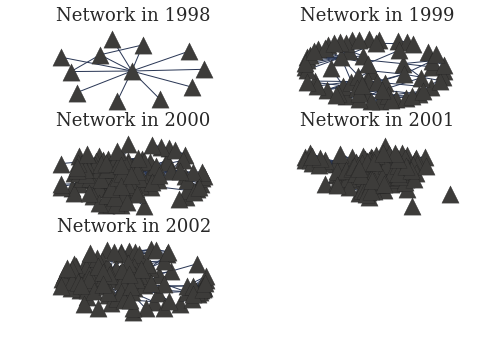

In [111]:
plt.figure(figsize=(8,11))
for i in range(len(all_year_G)):
    plt.subplot(6,2,i+1)
    nx.draw_spring(all_year_G[i],  node_color='#3D3C3A',node_shape='^',edge_color ='#2B3856')
    plt.title("Network in "  + str(years[i]), fontsize=14)
plt.savefig('images/yearly_net.png')

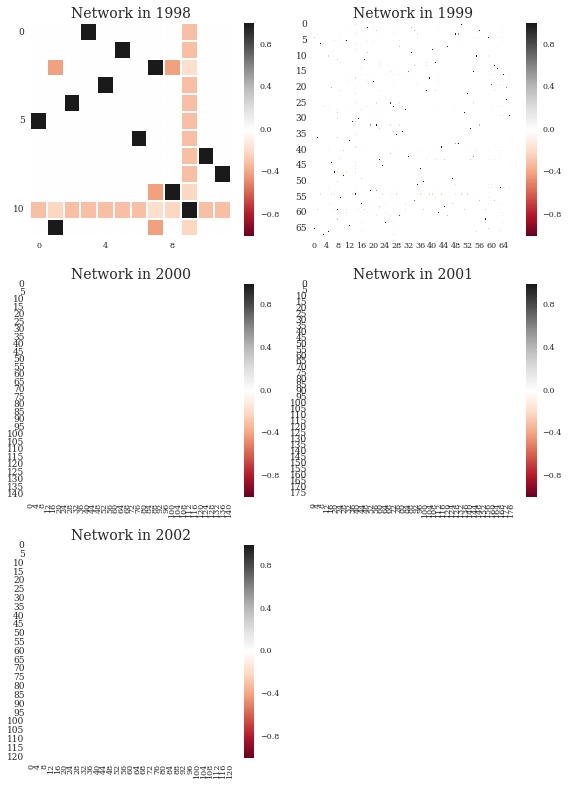

In [112]:
plt.figure(figsize=(8,11))
for i in range(len(all_year_G)):
    m = nx.normalized_laplacian_matrix(all_year_G[i]).todense()
    g = sns.clustermap(m)
    plt.close()
    ind = g.dendrogram_row.reordered_ind
    plt.subplot(3,2,i+1)
    sns.heatmap(m[ind][ind], cmap='RdGy', linewidths=1, xticklabels=4,yticklabels=5)
    plt.title("Network in "  + str(years[i]), fontsize=14)
    plt.yticks(fontsize=9, rotation=360)
    plt.tight_layout()
plt.savefig('images/yearly_net_mat.png')

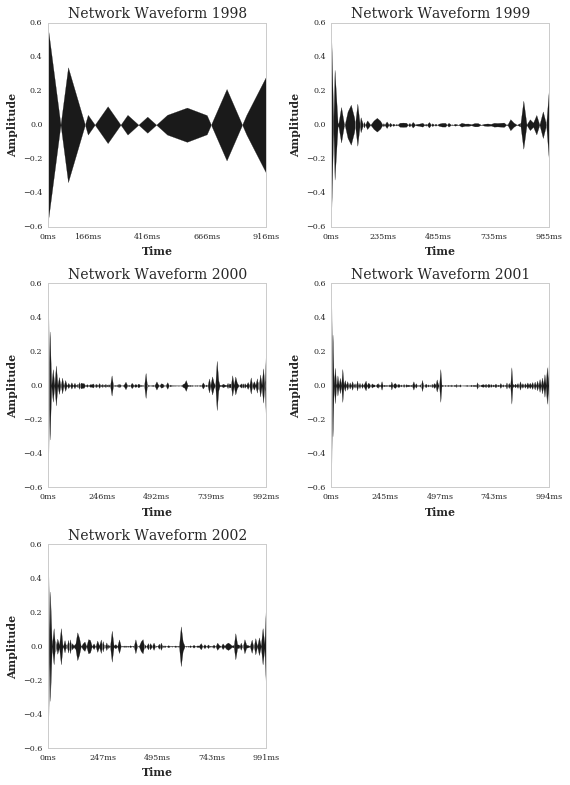

In [122]:
plt.figure(figsize=(8,11))
for i in range(len(all_year_G)):
    f = sc.fftpack.rfft(nx.normalized_laplacian_matrix(all_year_G[i]).todense()).mean(axis=1)
    fs = f.shape[0]

    plt.subplot(3,2,i+1)
    librosa.display.waveplot(f, fs,color='k')
    plt.title("Network Waveform " + str(years[i]), fontsize=14)
    plt.xlabel("Time", fontsize=11)
    plt.ylabel("Amplitude", fontsize=11)
    plt.grid(False)
    plt.tight_layout()
plt.savefig('images/yearly_net_audio.png')

## Monthly networks

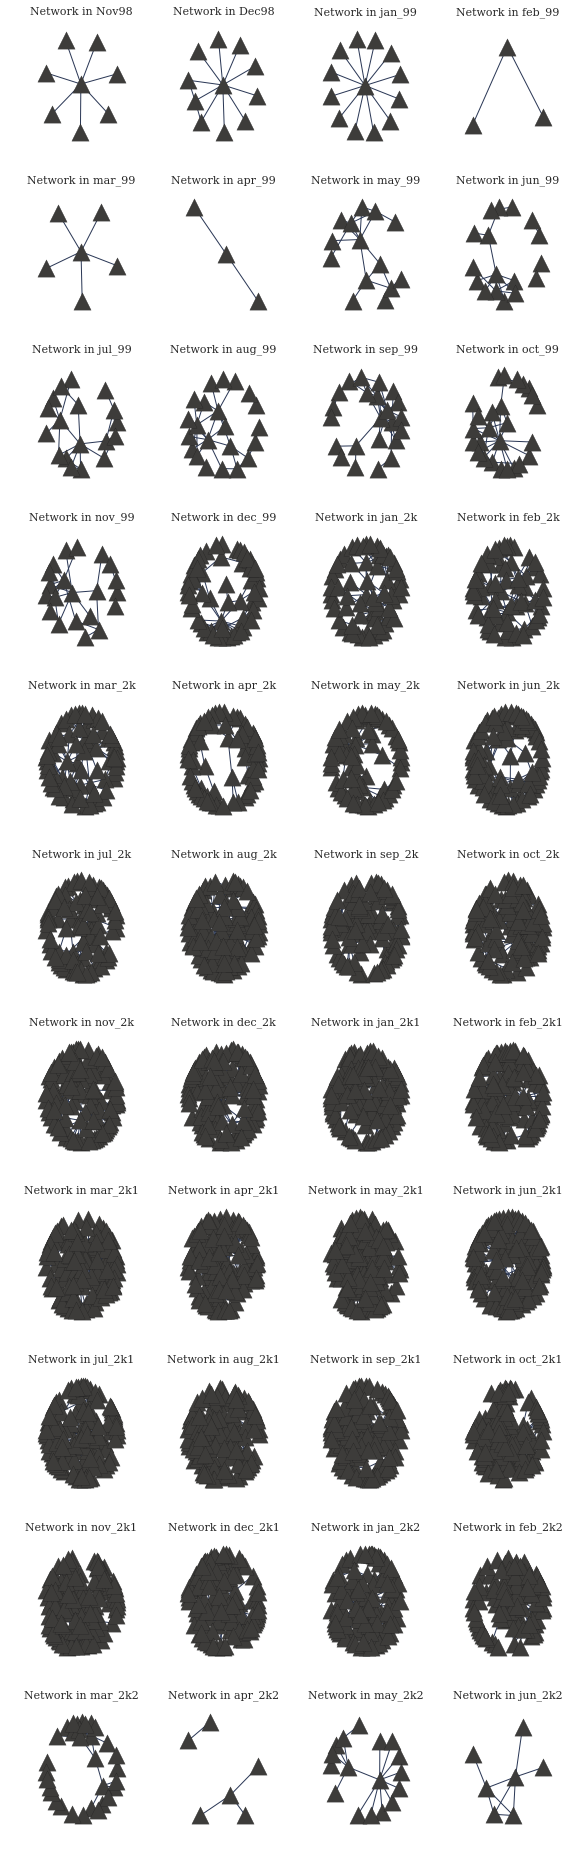

In [121]:
plt.figure(figsize=(8,28))
for i in range(len(all_month_G)):
    plt.subplot(12,4, i+1)
    nx.draw_spring(all_month_G[i],  node_color='#3D3C3A',node_shape='^',edge_color ='#2B3856')
    plt.title("Network in "  + str(months[i]), fontsize=11)
    plt.tight_layout()
plt.savefig('images/mth_net_nodelink.png')

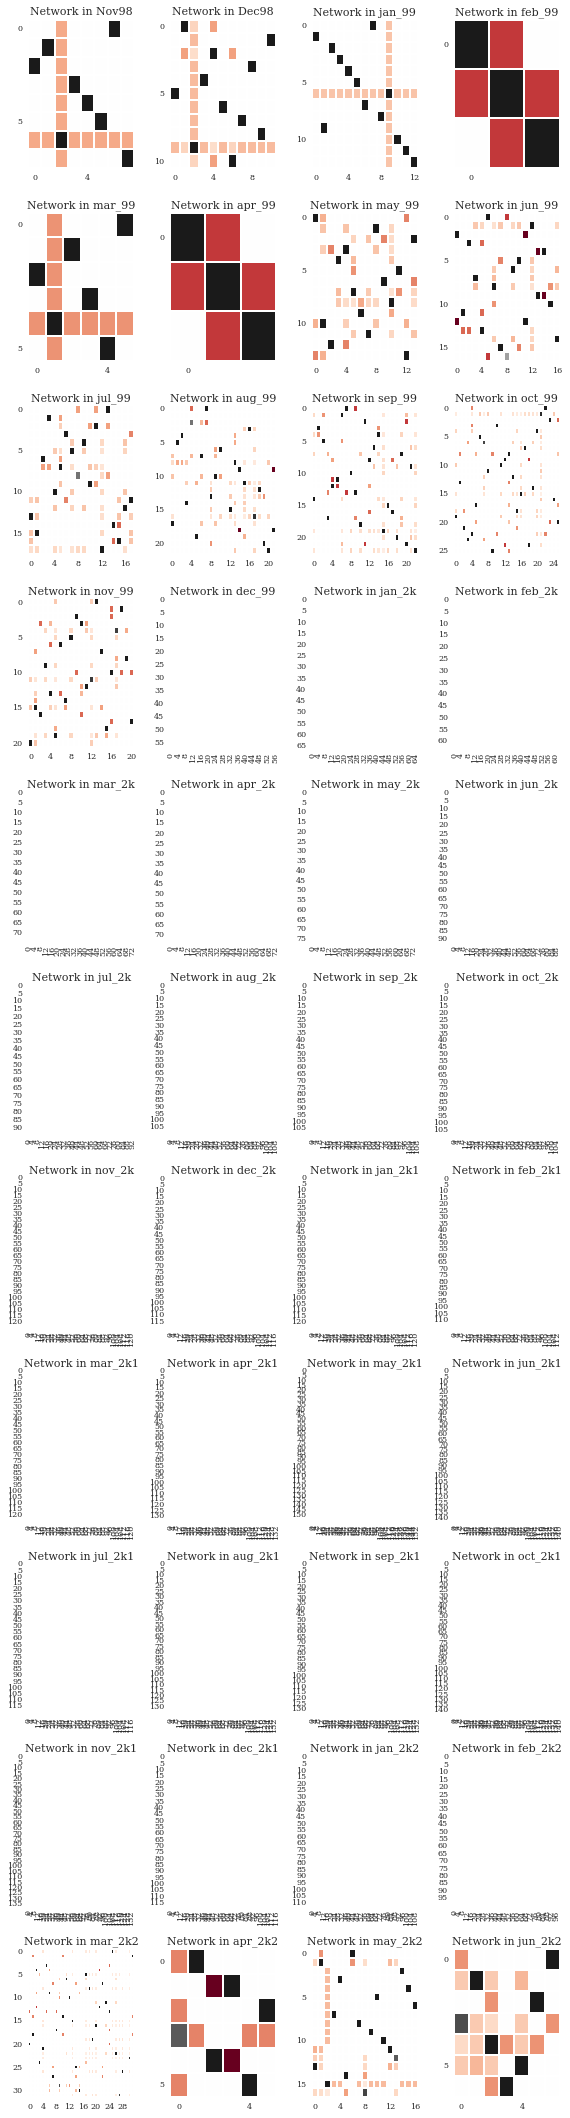

In [124]:
plt.figure(figsize=(8,32))
for i in range(len(all_month_G)):
    m = nx.normalized_laplacian_matrix(all_month_G[i]).todense()
    g = sns.clustermap(m)
    plt.close()
    ind = g.dendrogram_row.reordered_ind
    plt.subplot(12, 4, i+1)
    sns.heatmap(m[ind][ind], cmap='RdGy', linewidths=1, xticklabels=4,yticklabels=5, cbar=False)
    plt.title("Network in "  + str(months[i]), fontsize=11)
    plt.yticks(rotation=360)
    plt.tight_layout()
plt.savefig('images/mth_net_mat.png')

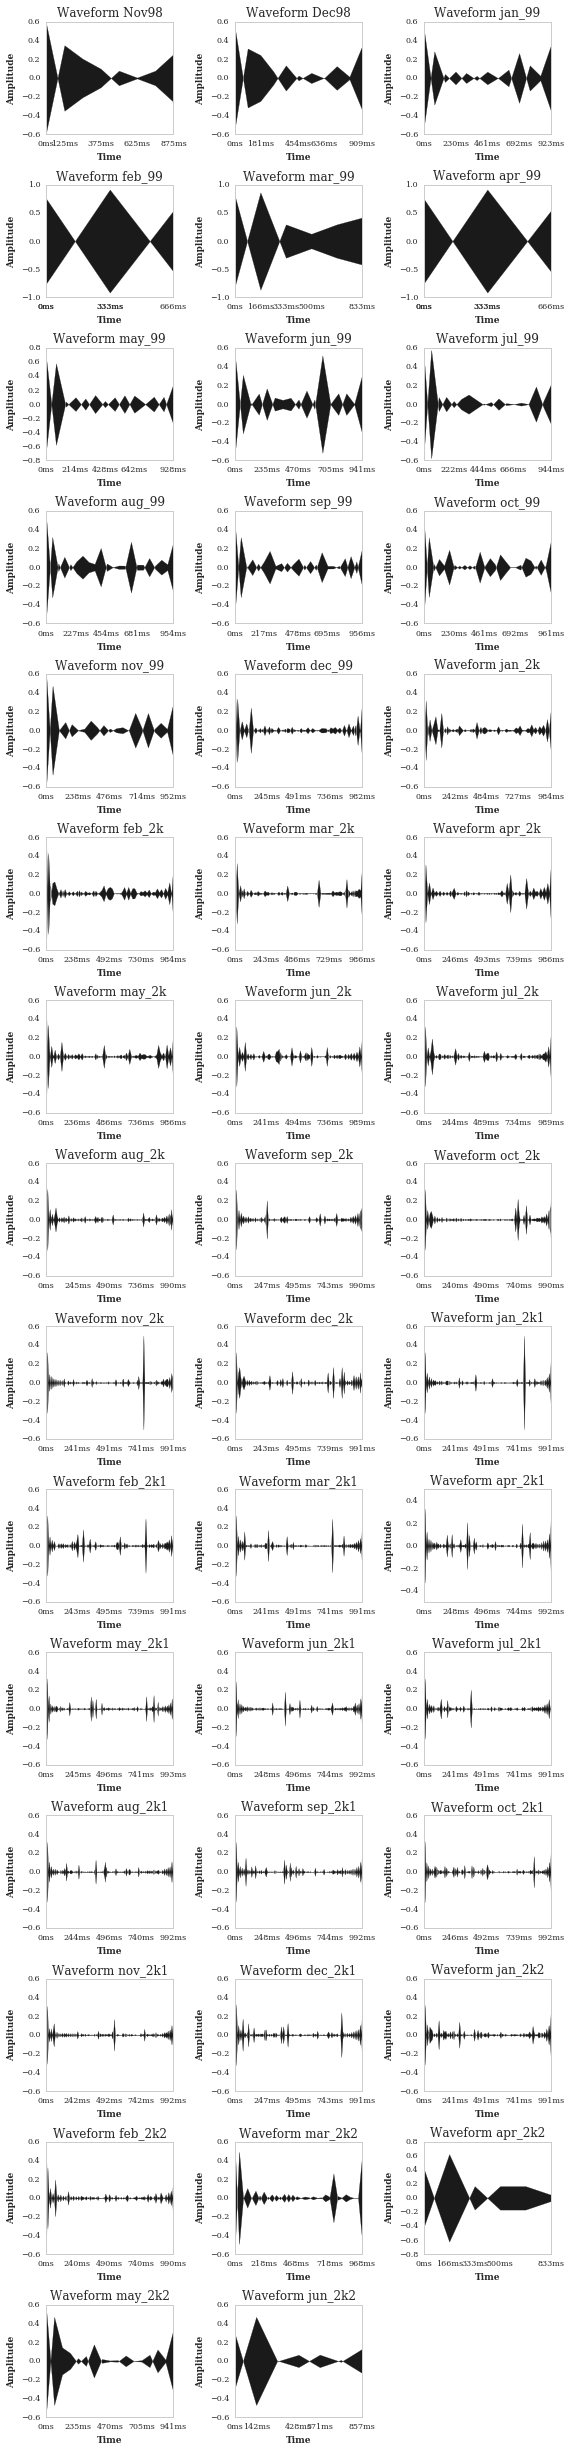

In [135]:
plt.figure(figsize=(8,36))

for i in range(len(all_month_G)):
    f = sc.fftpack.rfft(nx.normalized_laplacian_matrix(all_month_G[i]).todense()).mean(axis=1)
    fs = f.shape[0]
   
    plt.subplot(16, 3, i+1)
    librosa.display.waveplot(f, fs,color='k')
    plt.title("Waveform " + str(months[i]), fontsize=12)
  
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(False)
    plt.tight_layout()
plt.savefig('images/mth_net_audio.png')

# Exploratory Analysis

## Yearly Networks

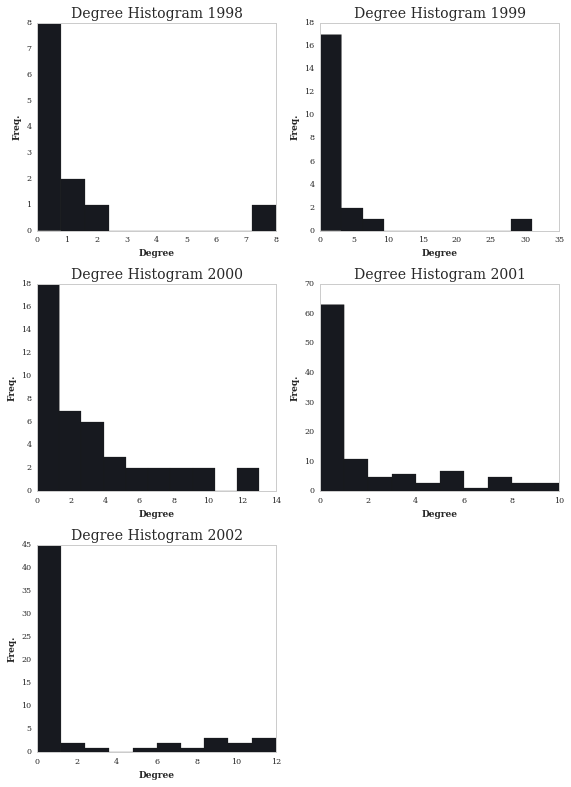

In [126]:
plt.figure(figsize=(8,11))
for i in range(len(all_year_G)):
    deg = nx.degree_histogram(all_year_G[i])
    plt.subplot(3, 2, i+1)
    plt.hist(deg)
    plt.title("Degree Histogram " + str(years[i]), fontsize=14)
    plt.xlabel("Degree")
    plt.ylabel("Freq.")
    plt.grid(False)
    plt.tight_layout()
plt.savefig('images/year_deghist.png')

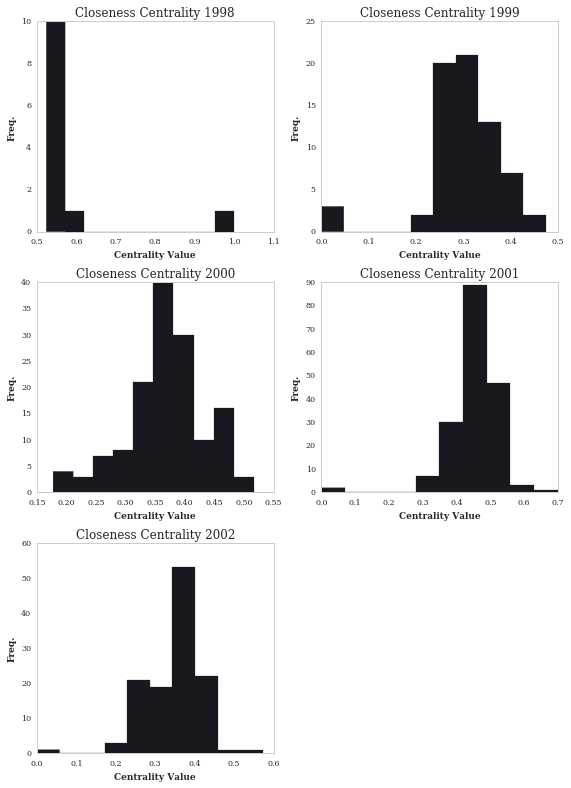

In [136]:
plt.figure(figsize=(8,11))
for i in range(len(all_year_G)):
    deg = nx.closeness_centrality(all_year_G[i]).values()
    deg = sorted(deg)
    plt.subplot(3, 2, i+1)
    plt.hist(deg)
    plt.title("Closeness Centrality " + str(years[i]), fontsize=12)
    plt.xlabel("Centrality Value")
    plt.ylabel("Freq.")
    plt.grid(False)
    plt.tight_layout()
plt.savefig('images/year_clohist.png')

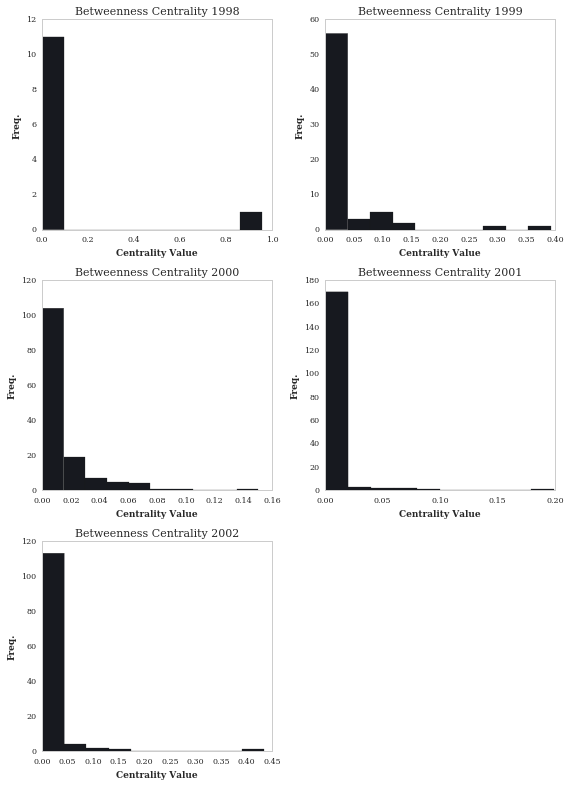

In [137]:
plt.figure(figsize=(8,11))
for i in range(len(all_year_G)):
    deg = nx.betweenness_centrality(all_year_G[i]).values()
    deg = sorted(deg)
    plt.subplot(3, 2, i+1)
    plt.hist(deg)
    plt.title("Betweenness Centrality " + str(years[i]), fontsize=11)
    plt.xlabel("Centrality Value")
    plt.ylabel("Freq.")
    plt.grid(False)
    plt.tight_layout()
plt.savefig('images/year_bethist.png')

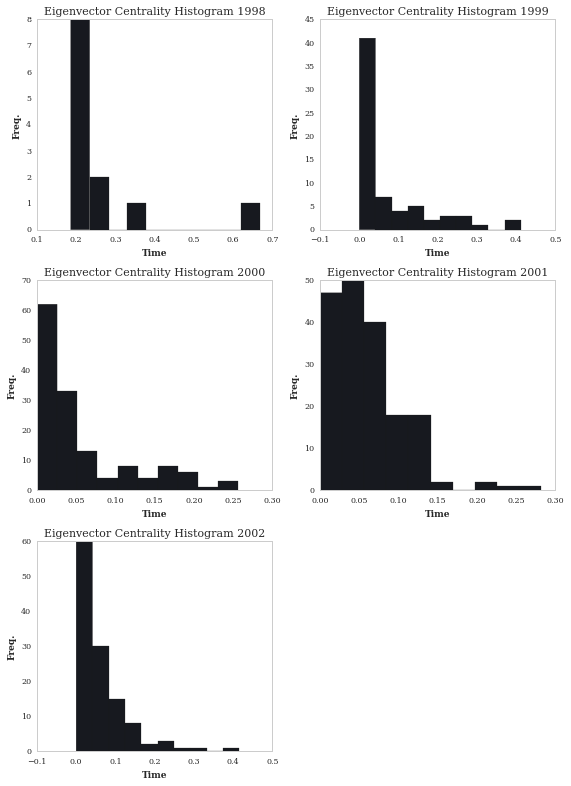

In [138]:
plt.figure(figsize=(8,11))
for i in range(len(all_year_G)):
    deg = nx.eigenvector_centrality_numpy(all_year_G[i]).values()
    deg = sorted(deg)
    plt.subplot(3, 2, i+1)
    plt.hist(deg)
    plt.title("Eigenvector Centrality Histogram " + str(years[i]), fontsize=11)
    plt.xlabel("Time")
    plt.ylabel("Freq.")
    plt.grid(False)
    plt.tight_layout()
plt.savefig('images/year_eighist.png')

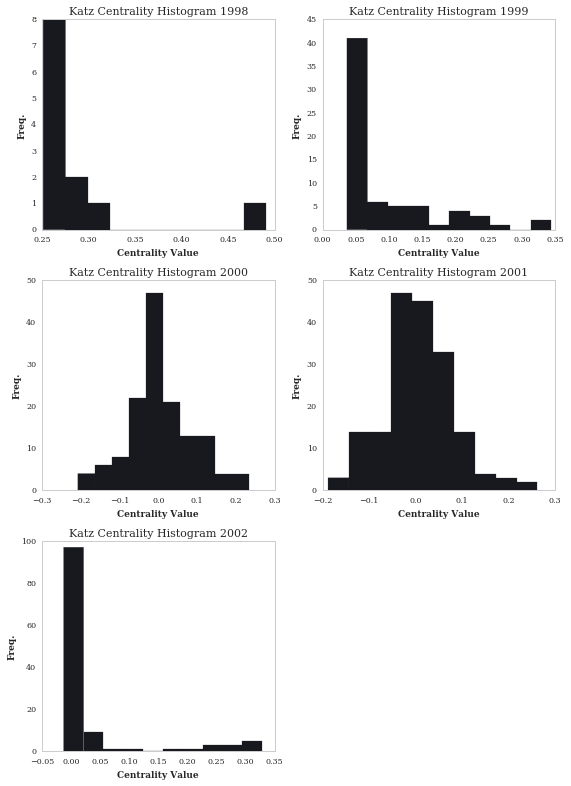

In [139]:
plt.figure(figsize=(8,11))
for i in range(len(all_year_G)):
    deg = nx.katz_centrality_numpy(all_year_G[i]).values()
    deg = sorted(deg)
    plt.subplot(3, 2, i+1)
    plt.hist(deg)
    plt.title("Katz Centrality Histogram " + str(years[i]), fontsize=11)
    plt.xlabel("Centrality Value")
    plt.ylabel("Freq.")
    plt.grid(False)
    plt.tight_layout()
plt.savefig('images/year_katzhist.png')

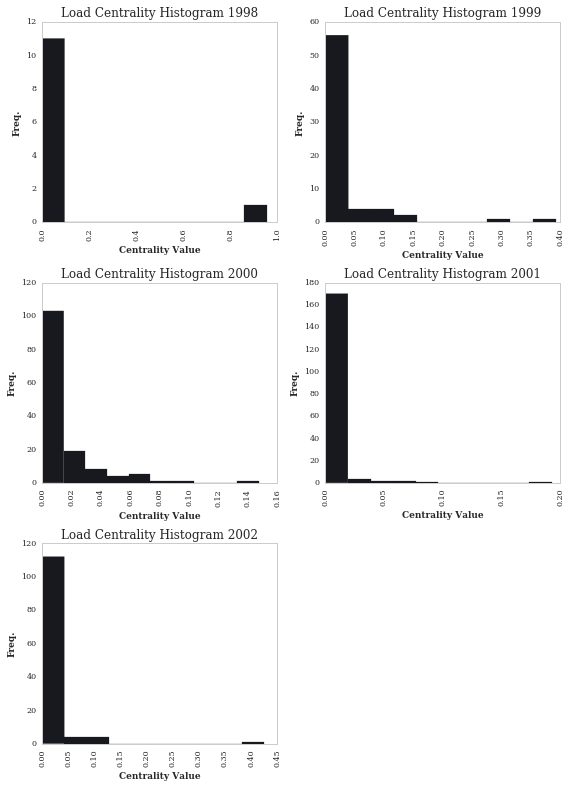

In [140]:
plt.figure(figsize=(8,11))
for i in range(len(all_year_G)):
    deg = nx.load_centrality(all_year_G[i]).values()
    deg = sorted(deg)
    plt.subplot(3, 2, i+1)
    plt.hist(deg)
    plt.title("Load Centrality Histogram " + str(years[i]), fontsize=12)
    plt.xticks(rotation=90)
    plt.xlabel("Centrality Value")
    plt.ylabel("Freq.")
    plt.grid(False)
    plt.tight_layout()
plt.savefig('images/year_loadhist.png')

## Monthly Networks

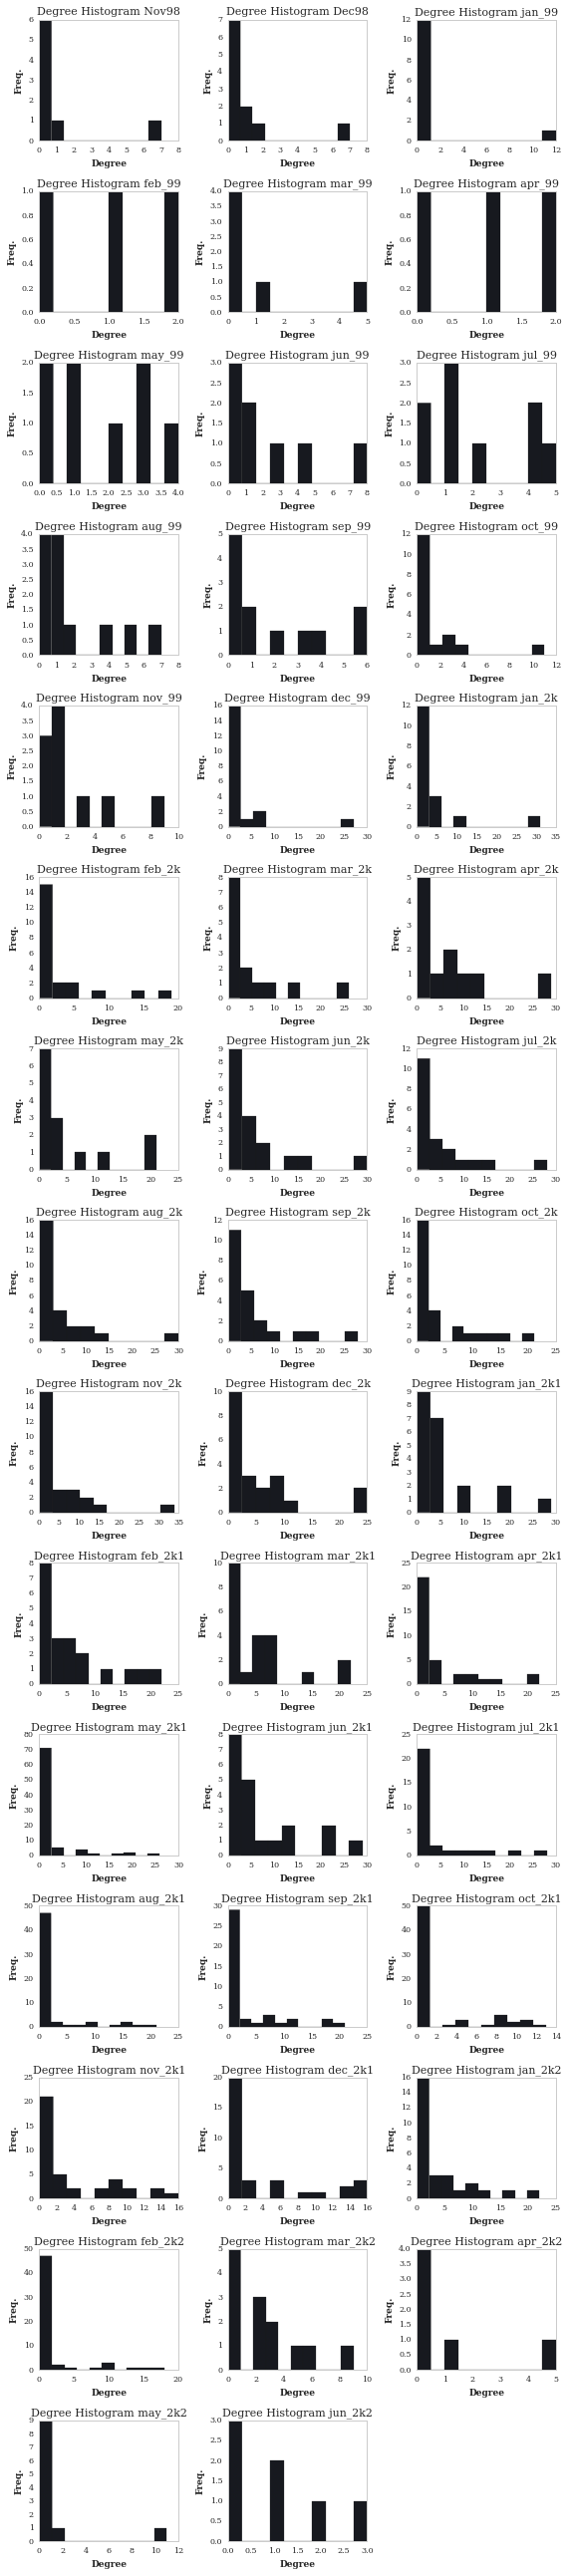

In [141]:
plt.figure(figsize=(8,38))
for i in range(len(all_month_G)):
    deg = nx.degree_histogram(all_month_G[i])
    plt.subplot(16, 3, i+1)
    plt.hist(deg)
    plt.title("Degree Histogram " + str(months[i]), fontsize=11)
    plt.xlabel("Degree")
    plt.ylabel("Freq.")
    plt.grid(False)
    plt.tight_layout()
plt.savefig('images/mth_deghist.png')

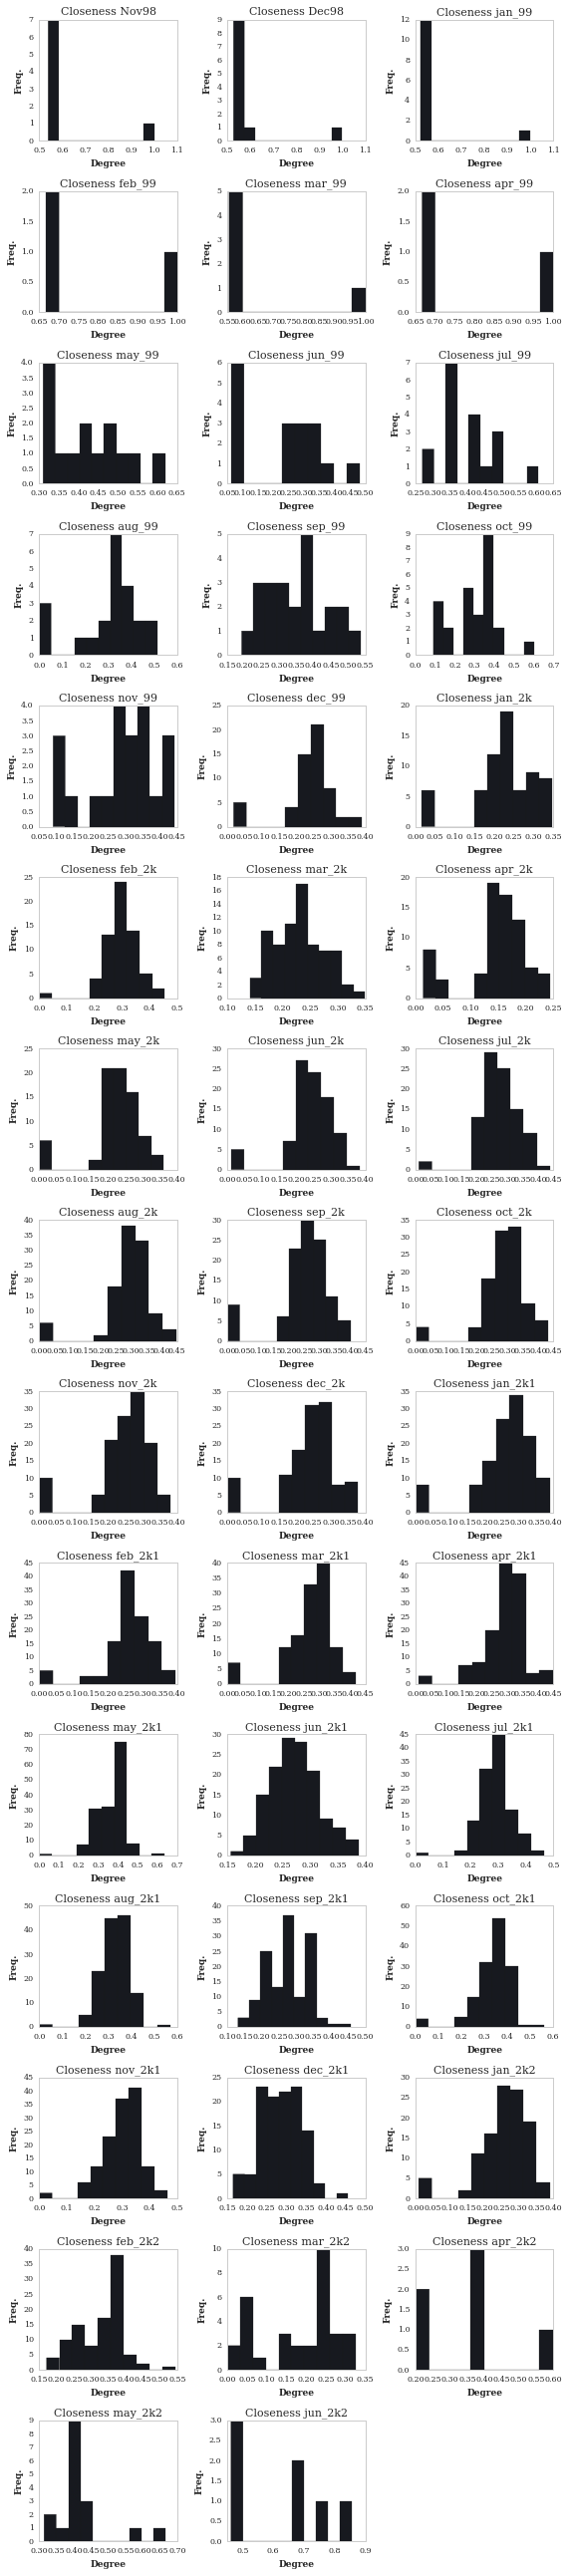

In [142]:
plt.figure(figsize=(8,38))
for i in range(len(all_month_G)):
    deg = nx.closeness_centrality(all_month_G[i]).values()
    deg = sorted(deg)
    plt.subplot(16, 3, i+1)
    plt.hist(deg)
    plt.title("Closeness " + str(months[i]), fontsize=11)
    plt.xlabel("Degree")
    plt.ylabel("Freq.")
    plt.grid(False)
    plt.tight_layout()
plt.savefig('images/mth_clohist.png')

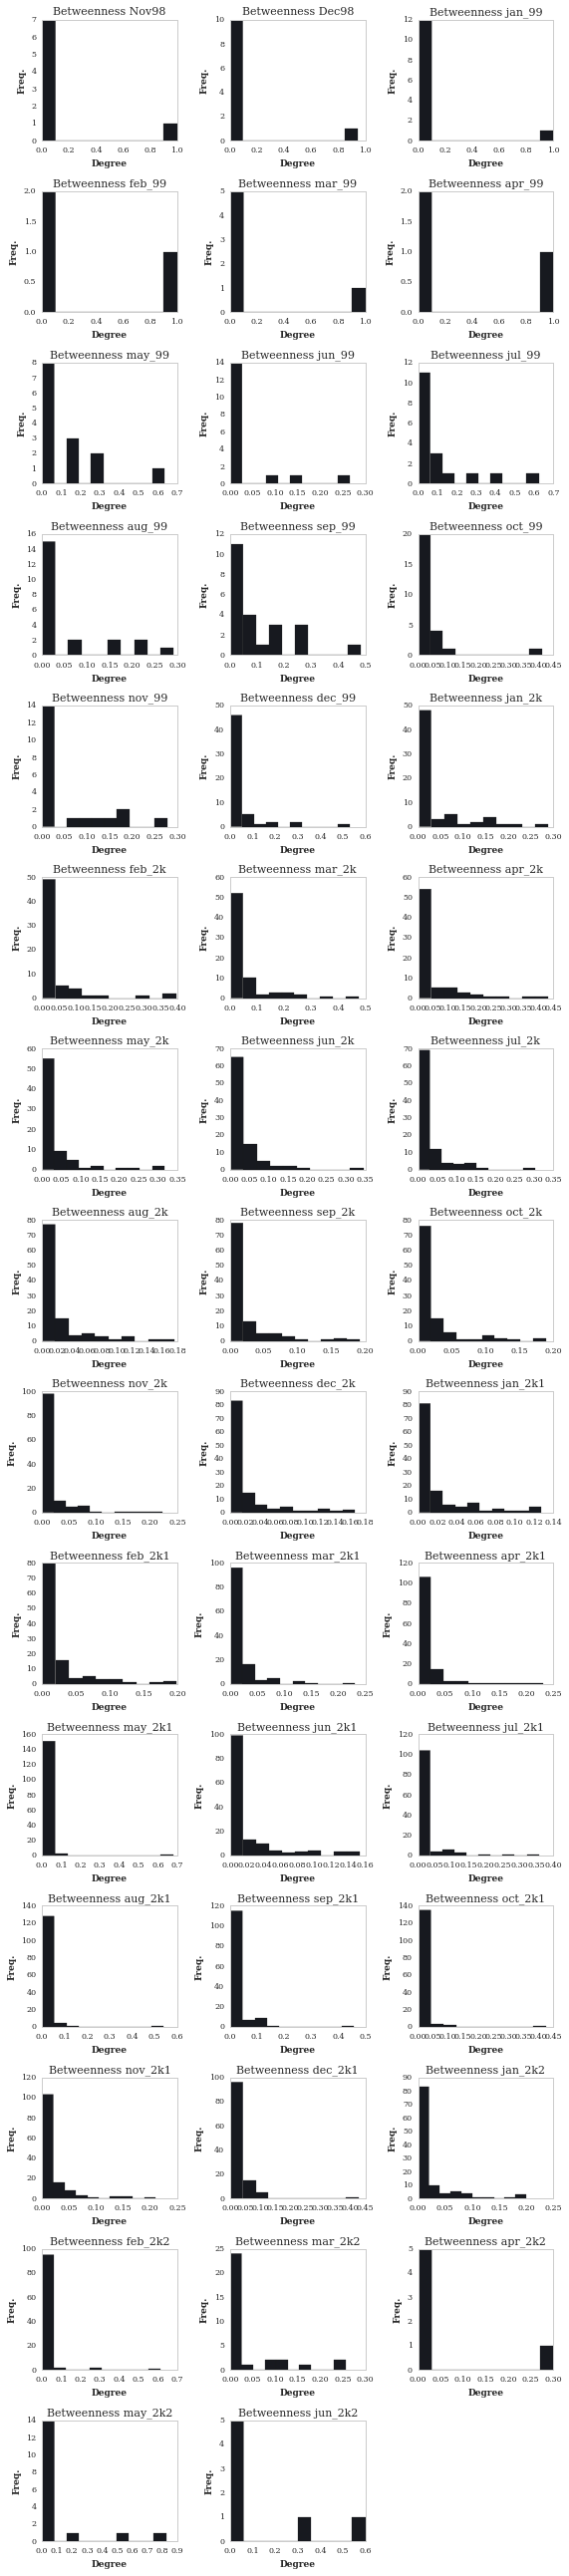

In [143]:
plt.figure(figsize=(8,38))
for i in range(len(all_month_G)):
    deg = nx.betweenness_centrality(all_month_G[i]).values()
    deg = sorted(deg)
    plt.subplot(16, 3, i+1)
    plt.hist(deg)
    plt.title("Betweenness " + str(months[i]), fontsize=11)
    plt.xlabel("Degree")
    plt.ylabel("Freq.")
    plt.grid(False)
    plt.tight_layout()
plt.savefig('images/mth_bethist.png')

/home/arshad/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


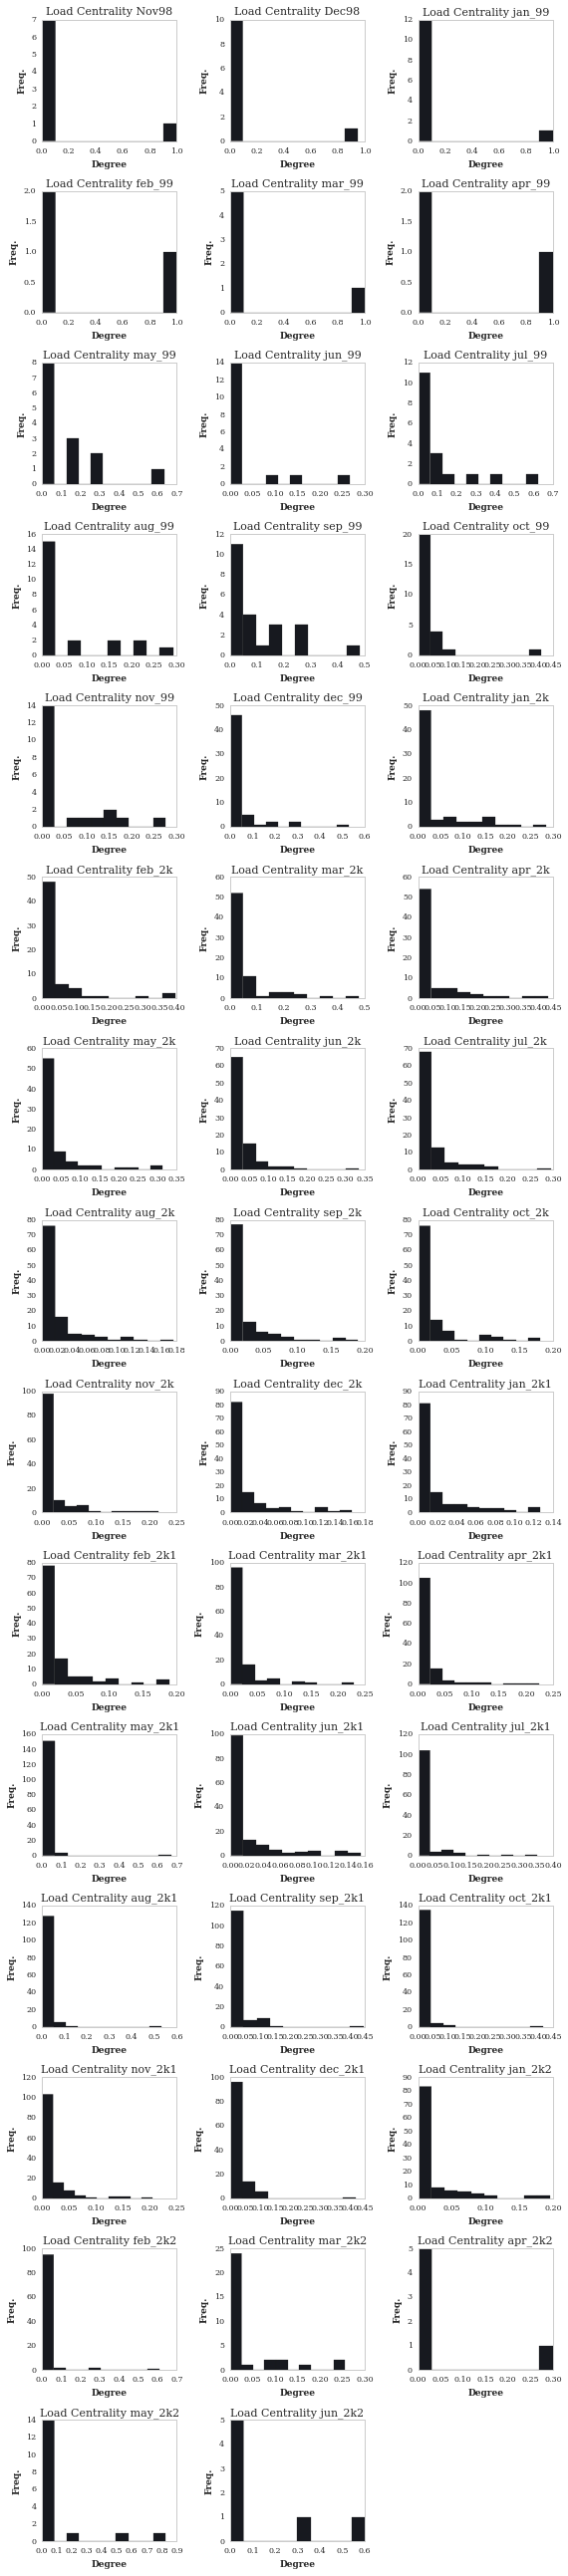

In [229]:
plt.figure(figsize=(8,38))
for i in range(len(all_month_G)):
    deg = nx.load_centrality(all_month_G[i]).values()
    deg = sorted(deg)
    plt.subplot(16, 3, i+1)
    plt.hist(deg)
    plt.title("Load Centrality " + str(months[i]), fontsize=11)
    plt.xlabel("Degree")
    plt.ylabel("Freq.")
    plt.grid(False)
    plt.tight_layout()
plt.savefig('images/mth_loadhist.png')

/home/arshad/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


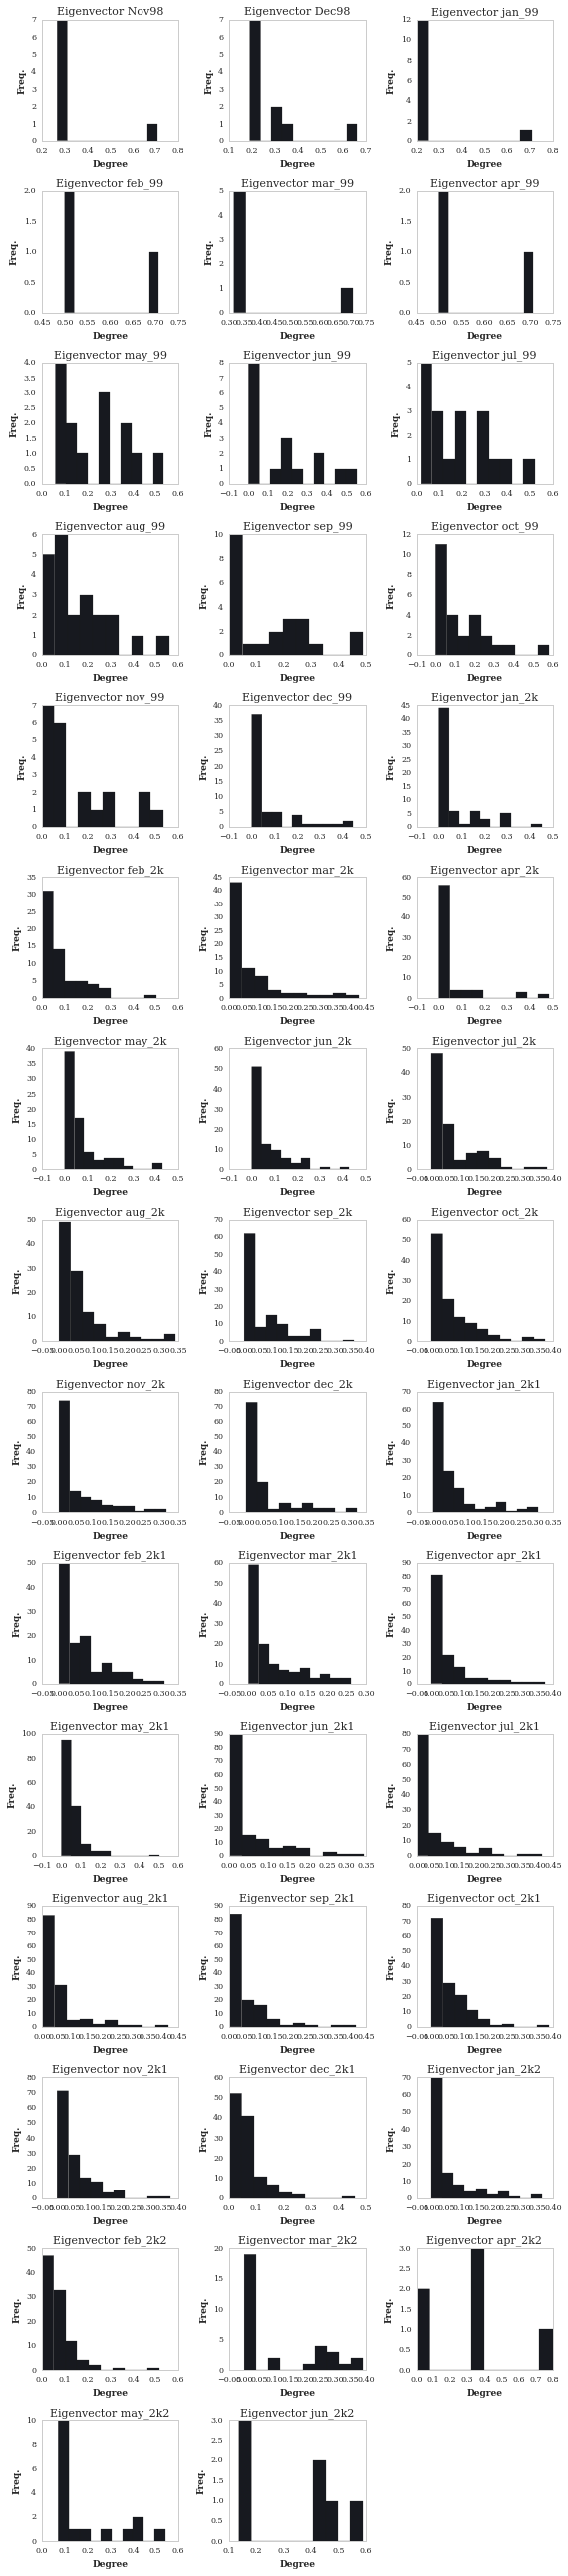

In [228]:
plt.figure(figsize=(8,38))
for i in range(len(all_month_G)):
    deg = nx.eigenvector_centrality_numpy(all_month_G[i]).values()
    deg = sorted(deg)
    plt.subplot(16,3, i+1)
    plt.hist(deg)
    plt.title("Eigenvector " + str(months[i]), fontsize=11)
    plt.xlabel("Degree")
    plt.ylabel("Freq.")
    plt.grid(False)
    plt.tight_layout()
plt.savefig('images/mth_eighist.png')

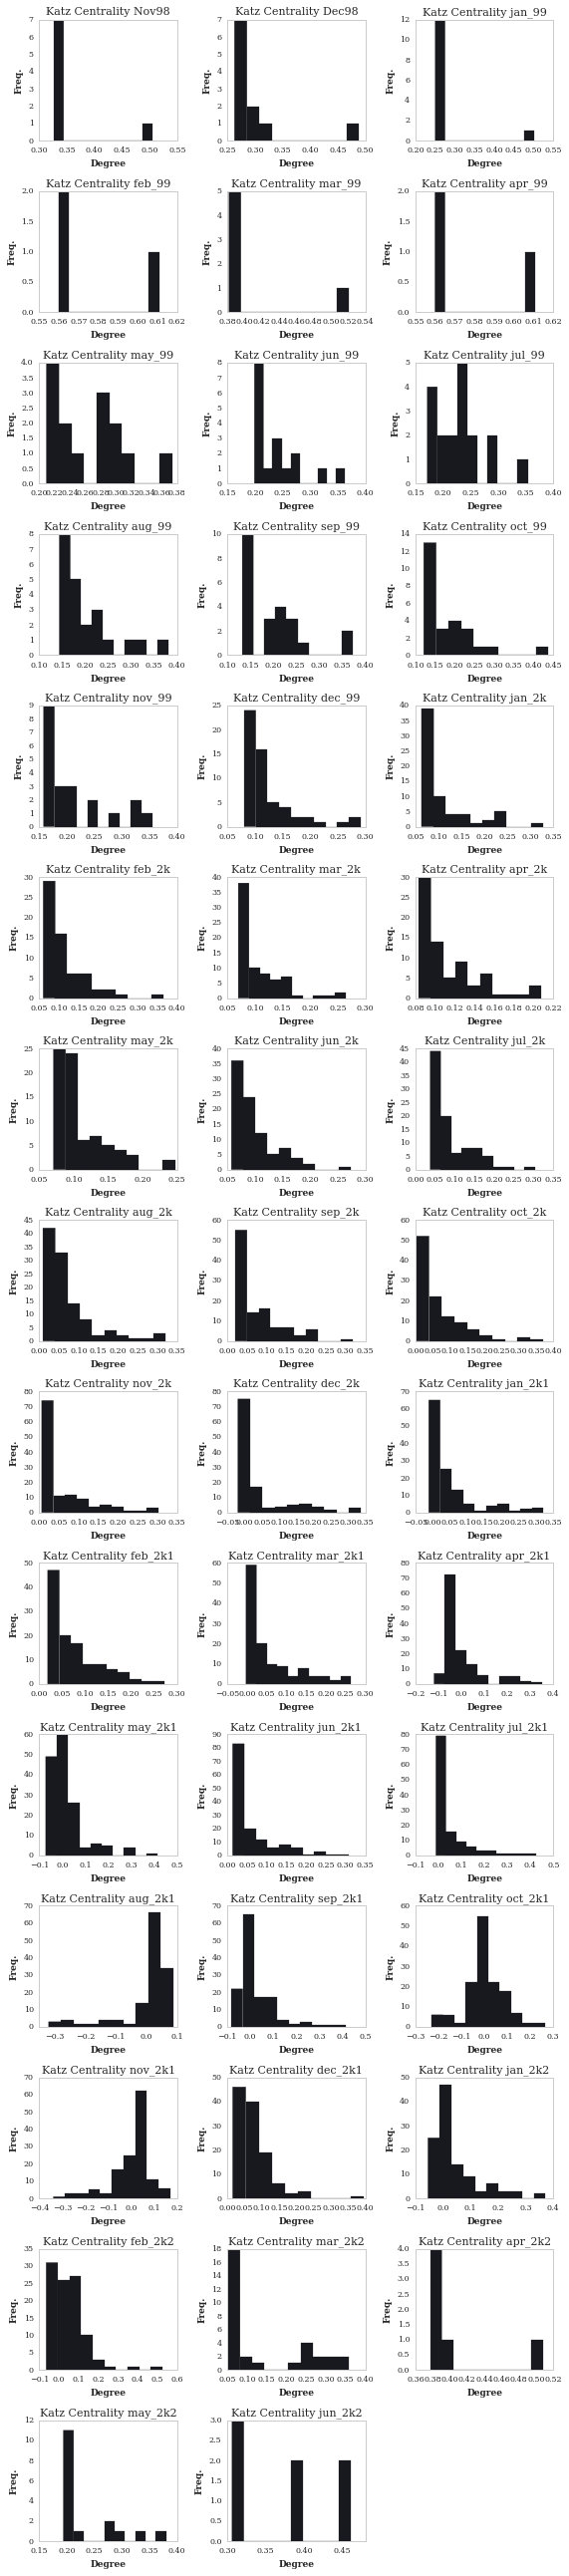

In [145]:
plt.figure(figsize=(8,38))
for i in range(len(all_month_G)):
    deg = nx.katz_centrality_numpy(all_month_G[i]).values()
    deg = sorted(deg)
    plt.subplot(16,3, i+1)
    plt.hist(deg)
    plt.title("Katz Centrality " + str(months[i]), fontsize=11)
    plt.xlabel("Degree")
    plt.ylabel("Freq.")
    plt.grid(False)
    plt.tight_layout()
plt.savefig('images/mth_katzhist.png')

# Attribute Analysis

## Traditional Measures

### Centrality
- Degree
- Betweeness
- Closeness
- Katz
- Load

### Assortativity & Linear Algebra
- Density
- Average Clustering Coefficient
- Algebraic Connectivity

## Complex Trace Attributes

- Instantaneous Amplitude
- Instantaneous Frequency
- Instantaneous Phase
- Derivative of Amplitude
- Second Derivative of Amplitude
- Power
- Cosine of Instantaneous Phase
- Amplitude weighted Frequency
- Amplitude weighted Phase
- Power Spectral Density

## Matrix

- Resistance Distance
- Stationarity Ratio
- Subgraph Stationarity
- Curvature
- Norm of Abel Transform

## Matrix Decomposition
- KLPCA Ratio Change
- Norm NMF Ratio Change

## Music Attributes
- Zero Crossing Rate
- Spectral Centroid

## Aggregation Measures
- Persistence
- Emergence
- NRMS of Attributes



In [38]:
def calc_seisatt(net):
    M = nx.normalized_laplacian_matrix(net).todense()
    Ht = hilbert(M)  
    rHt = np.real(Ht)
    iHt = np.imag(Ht)
    
    #Basic attributes IA, IP, IF
    IA = np.real(np.nan_to_num(np.sqrt(np.dot(rHt,rHt)+np.dot(iHt,iHt))))
    IP = np.real(np.nan_to_num(np.arctan(iHt/rHt)))
    IF,_ = np.real(np.nan_to_num(np.asarray(np.gradient(IP))))
    P = np.square(IA)
    
    #Derivatives 
    dIA,_ = np.nan_to_num(np.asarray(np.gradient(IA)))
    d2IA,_ = np.nan_to_num(np.asarray(np.gradient(dIA)))
    IAcc,_ =np.nan_to_num(np.asarray(np.gradient(IF)))
   
    #Derived Attributes
    cosIP = np.cos(IP)
    IA_weit_IF = IA * IF
    IA_weit_IP = IA*IP

    return [IA,IP,IF,P, dIA,d2IA, IAcc,cosIP,IA_weit_IF,IA_weit_IP]

In [39]:
def stationarity_ratio(G):
    #stationarity ratio with laplian
    L = nx.normalized_laplacian_matrix(G).todense()
    U = eigvals(L)
    C =np.cov(L)
    CF = np.dot(L,np.dot(np.dot(U.T,C),U))
    r = np.linalg.norm(np.diag(CF))/np.linalg.norm(CF)
       
    return r

In [40]:
#cite:`klein1993resistance`
def resistance_distance(net):  
    M = nx.normalized_laplacian_matrix(net).todense()
    pseudo = pinv(M)
    N = M.shape[0]
    d = np.diag(pseudo)
    rd  = np.kron(d,np.ones((N,1))).T+np.kron(d,np.ones((N,1))).T - pseudo - pseudo.T
    
    return rd.mean()

In [41]:
def curvature(net):
    from skimage.feature import hessian_matrix, hessian_matrix_det, hessian_matrix_eigvals
    M = nx.normalized_laplacian_matrix(net).todense()
    M = np.float64(M)
    fx, fy = np.gradient(M)
    Hxx, Hxy, Hyy = hessian_matrix(M)
    K = np.divide((np.dot(Hxx,Hxy)-np.dot(Hxy,Hxy)),\
                  (1+np.dot(fx,fx)+np.dot(fy,fy)))   
    He1,_ = hessian_matrix_eigvals(Hxx,Hxy,Hyy)
    mean_curv = np.trace(He1)
   
    return mean_curv

In [42]:
def kpca_ratio(net):
    from sklearn.decomposition import KernelPCA
    kpca = KernelPCA(n_components=3,kernel='rbf')
    m = nx.normalized_laplacian_matrix(net).todense()
    X_kpca = kpca.fit_transform(m)
    pc1 = X_kpca[:,0]
    pc2 = X_kpca[:,1]
    pc3 = X_kpca[:,2]
    kpca_rat = norm(pc1-pc3/(pc1-pc2)) 
    return kpca_rat

In [43]:
def kpca_att(net):
    kpca_chg = []
    for i in range(len(net)-1):
        x = int(i)
        y = 1+x
        kpcar1= kpca_ratio(net[x])
        kpcar2= kpca_ratio(net[y])
        kpca_chg.append(np.divide(kpcar2,kpcar1))
    kpca_chgpad = np.zeros(len(kpca_chg)+1);
    kpca_chgpad[1:] = kpca_chg   
    
    return kpca_chgpad

In [44]:
def nmf_att(net):
    nmf_chg = []
    
    nmf = NMF(init='nndsvda',solver='cd', random_state=0, l1_ratio=1)
    for i in range(len(net)-1):
        x = int(i)
        y = 1+x
        m1= abs(nx.normalized_laplacian_matrix(net[x]).todense())
        m2= abs(nx.normalized_laplacian_matrix(net[y]).todense())
        nmf1 = norm(nmf.fit_transform(m1))
        nmf2 = norm(nmf.fit_transform(m2))
        nmf_chg.append(np.divide(nmf2,nmf1))
    nmf_chgpad = np.zeros(len(nmf_chg)+1);
    nmf_chgpad[1:] = nmf_chg   
    
    return nmf_chgpad

In [45]:
def pad_shape(x,ref,offset=0):
    result = np.zeros_like(ref)
    result[0:x.shape[0]+0,0:x.shape[1]+0] = x
    
    return result

def subgraph_stat(net1,net2):
    net1_int_net2 = net1.copy()
    net1_int_net2.remove_nodes_from(n for n in net1 if n not in net2)
    net1_u_net2 = nx.disjoint_union(net1, net2)
    int_adjmat = nx.normalized_laplacian_matrix(net1_int_net2).todense()
    uni_adjmat = nx.normalized_laplacian_matrix(net1_u_net2).todense()
    int_adjmat_pad = pad_shape(int_adjmat,uni_adjmat)
    
    Ct = np.divide(norm(int_adjmat_pad),norm(uni_adjmat))
    
    return Ct

def zeta(n):
       
    Ct_m = []
    for i in range(len(n)-1):
        x = int(i)
        y = x +1
        Ct_m.append(subgraph_stat(n[x],n[y]))
    Ct_m_pad = np.zeros(len(Ct_m)+1);
    Ct_m_pad[1:] = Ct_m
    return Ct_m_pad

In [46]:
def music_att(n):
    #music attributes
    f = sc.fftpack.rfft(nx.normalized_laplacian_matrix(n).todense()).mean(axis=1)
    zcr = librosa.feature.zero_crossing_rate(f)[0,0]
    spc = librosa.feature.spectral_centroid(f)[0,0]
    
    return [zcr,spc]

In [47]:
def norm_fabel(x):
    import abel
    fabel_att =[]
    for n in x:
        tmp = nx.normalized_laplacian_matrix(n).todense()
        tmp2 = sc.fftpack.fft2(tmp)
        fabel2 = abel.Transform(tmp2, direction='forward', method='direct').transform
        mag = np.sqrt(np.square(np.real(fabel2)) + np.square(np.imag(fabel2)))
        fabel_att.append(norm(mag))
        
    return np.log10(fabel_att)

In [48]:
def cal_avg_atts(x):
    
    #define attributes placeholders here
    deg_y = []
    bet_y = []
    clo_y = []
    load_y = []
    eig_y = []
    katz_y = []
    den_y = []
    algc_y = []
    cluscof_y = []
    IA_y = []
    IP_y = [] 
    IF_y = []
    P_y = []
    dIA_y = []
    d2IA_y =[] 
    IAcc_y = []
    cosIP_y = []
    IA_weit_IF_y = []
    IA_weit_IP_y = []
    psd_y = []    
    rd_y = []    
    zcr_y = []
    spc_y = []
    statr_y = []   
    meank_y = []
    
    #matrix decompostion attributes
    zeta_y = zeta(x)
    nmf_ratio_y = nmf_att(x)
    kpca_chg_y= kpca_att(x)
    prop_members_chg_1_zeta = 1-zeta_y
    fabel = norm_fabel(x)
    
    for n in x:
        deg = np.mean(sorted(set(nx.degree_centrality(n).values())))
        bet = np.mean(sorted(set(nx.betweenness_centrality(n).values())))
        clo = np.mean(sorted(set(nx.closeness_centrality(n).values())))
        katz = np.mean(sorted(set(nx.katz_centrality_numpy(n).values())))
        eig = np.mean(sorted(set(nx.eigenvector_centrality_numpy(n).values())))
        load = np.mean(sorted(set(nx.degree_centrality(n).values())))
        den = nx.density(n)
        algc = nx.algebraic_connectivity(n)
        clustcof = nx.average_clustering(n)

        #all network metrics
        deg_y.append(deg), bet_y.append(bet), clo_y.append(clo), load_y.append(load), katz_y.append(katz), \
        den_y.append(den),  algc_y.append(algc), cluscof_y.append(clustcof), eig_y.append(eig)

        #complex trace attributes
        IA,IP,IF,P, dIA,d2IA, IAcc,cosIP,IA_weit_IF,IA_weit_IP = calc_seisatt(n)
        IA_y.append(IA.mean())
        IP_y.append(IP.mean())
        IF_y.append(IF.mean())
        P_y.append(P.mean())
        dIA_y.append(dIA.mean())
        d2IA_y.append(d2IA.mean()) 
        IAcc_y.append(IAcc.mean())
        cosIP_y.append(cosIP.mean())
        IA_weit_IF_y.append(IA_weit_IF.mean())
        IA_weit_IP_y.append(IA_weit_IP.mean())

        psd, _ = plt.psd(nx.laplacian_matrix(n).todense());
        plt.close()
        psd_y.append(psd.mean())

        zcr, spc = music_att(n)
        zcr_y.append(zcr)
        spc_y.append(np.log10(spc))

        #matrix attributes
        rdm = resistance_distance(n)
        rd_y.append(rdm)

        statrat = stationarity_ratio(n)
        statr_y.append(statrat)

        meank = curvature(n)
        meank_y.append(meank)
        


    colnames = ['AvgDeg','AvgBet','AvgClo','AvgLoad','AvgKatz','AvgDensity','AvgAlgCon','AvgClustCoff',''\
               'AvgEig' ,'InstAmp','InstPhase','InstFreq','Power','dInstAmp','d2InstAmp','InstAcc','cosInstPhase',\
               'A_wt_IF','A_wt_IP','PowerSpecDen','ResDist','ZeroCrossRate','LogSpecCentroid','StatRat','MeanCurv']

    attvol_y = pd.DataFrame([deg_y,bet_y, clo_y ,load_y ,katz_y ,den_y, algc_y ,cluscof_y,eig_y ,IA_y ,IP_y , IF_y,\
                 P_y ,dIA_y ,d2IA_y,IAcc_y ,cosIP_y ,IA_weit_IF_y ,IA_weit_IP_y ,psd_y ,rd_y, zcr_y ,spc_y,\
                 statr_y , meank_y]).T

    attvol_y.columns = colnames
    attvol_y['SubgraphStat']=zeta_y
    attvol_y['1-Zeta'] = prop_members_chg_1_zeta
    attvol_y['LogKPCARatioChg'] = np.log10(kpca_chg_y)
    attvol_y.LogKPCARatioChg[0]=0
    attvol_y['NormNMFRatioChg']= nmf_ratio_y
    attvol_y['NormFAbel'] = fabel
    attvol_y_sc = attvol_y.apply(lambda x: minmax_scale(x, feature_range=[-1,1]))

    return attvol_y_sc


In [49]:
attvol_y = cal_avg_atts(all_year_G)

/home/arshad/anaconda3/lib/python3.5/site-packages/abel/transform.py:341: ComplexWarning: Casting complex values to real discards the imaginary part
  self.IM = self.IM.astype('float64')


In [50]:
attvol_m = cal_avg_atts(all_month_G)

/home/arshad/anaconda3/lib/python3.5/site-packages/abel/transform.py:341: ComplexWarning: Casting complex values to real discards the imaginary part
  self.IM = self.IM.astype('float64')


# Overview Plots

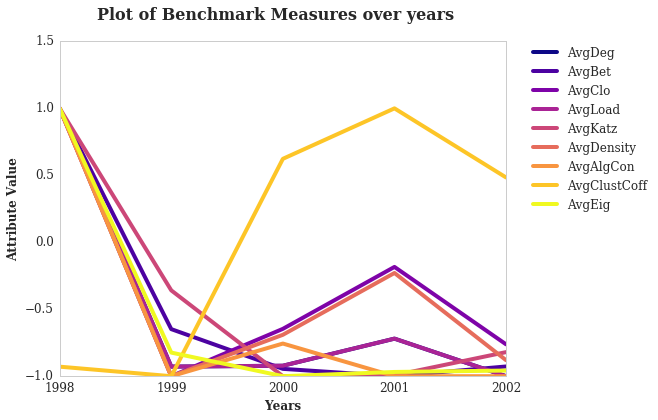

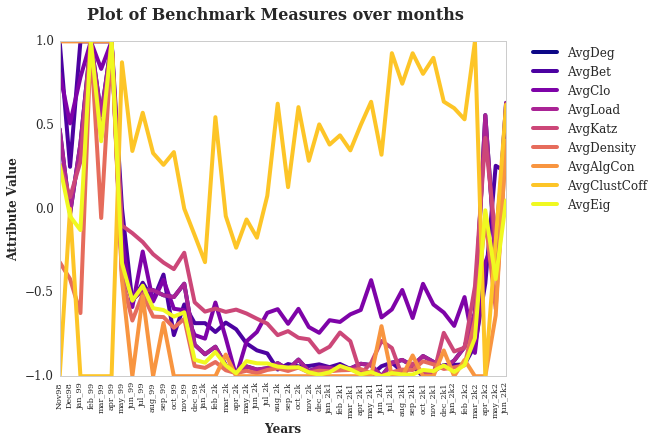

In [153]:
attvol_y.iloc[:,:9].plot.line(use_index=True,cmap='plasma')
plt.xlabel("Years", fontsize=12)
plt.ylabel("Attribute Value", fontsize=12)
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(years)), years,fontsize=12)
plt.yticks(fontsize=12)
plt.suptitle("Plot of Benchmark Measures over years", fontsize=16)

attvol_m.iloc[:,:9].plot.line(use_index=True,cmap='plasma', rot=90)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Attribute Value", fontsize=12)
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(months)), months)
plt.yticks(fontsize=12)
plt.suptitle("Plot of Benchmark Measures over months", fontsize=16)

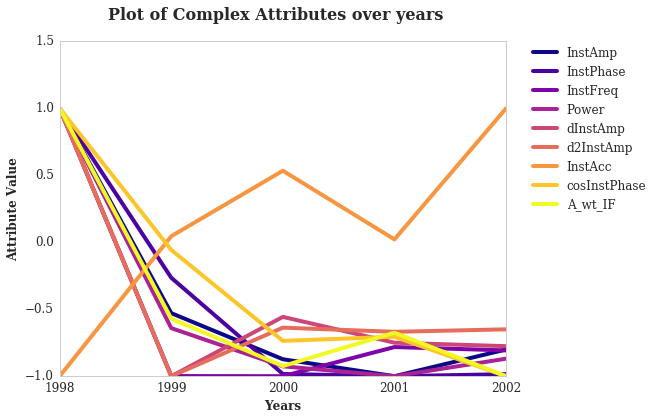

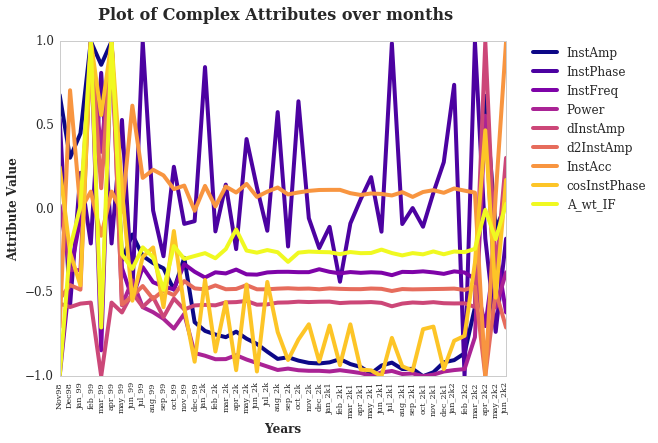

In [155]:
attvol_y.iloc[:,9:18].plot.line(use_index=True,cmap='plasma')
plt.xlabel("Years", fontsize=12)
plt.ylabel("Attribute Value", fontsize=12)
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(years)), years,fontsize=12)
plt.yticks(fontsize=12)
plt.suptitle("Plot of Complex Attributes over years", fontsize=16)
plt.autoscale()

attvol_m.iloc[:,9:18].plot.line(use_index=True,cmap='plasma', rot=90)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Attribute Value", fontsize=12)
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(months)), months)
plt.yticks(fontsize=12)
plt.suptitle("Plot of Complex Attributes over months", fontsize=16)
plt.autoscale()

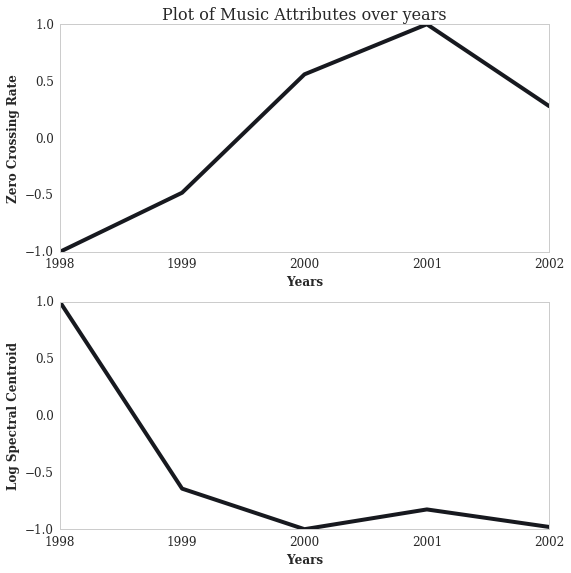

In [156]:
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.title("Plot of Music Attributes over years", fontsize=16)
plt.plot(attvol_y.ZeroCrossRate)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Zero Crossing Rate", fontsize=12)
plt.xticks(np.arange(len(years)),years,fontsize=12)
plt.yticks(fontsize=12)
plt.autoscale()

plt.subplot(2,1,2)
plt.plot(attvol_y.LogSpecCentroid)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Log Spectral Centroid", fontsize=12)
plt.xticks(np.arange(len(years)),years,fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('images/musicatt_yrs.png')

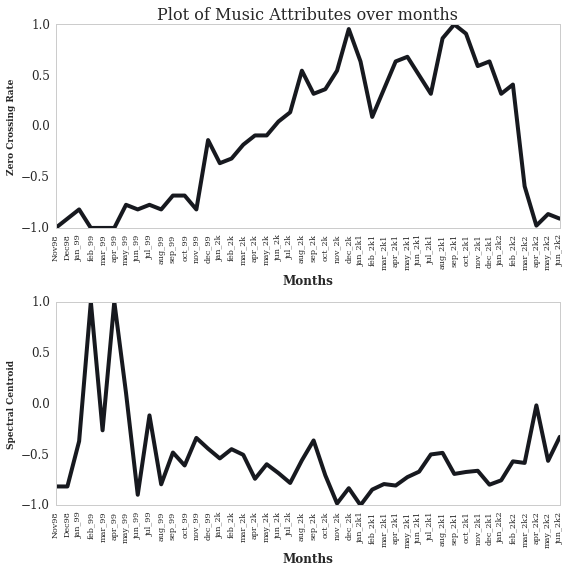

In [157]:
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.title("Plot of Music Attributes over months", fontsize=16)
plt.plot(attvol_m.ZeroCrossRate.values)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Zero Crossing Rate")
plt.xticks(np.arange(len(months)), months, rotation=90)
plt.yticks(fontsize=12)
plt.autoscale()

plt.subplot(2,1,2)
plt.plot(attvol_m.LogSpecCentroid.values)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Spectral Centroid")
plt.xticks(np.arange(len(months)), months, rotation=90)
plt.yticks(fontsize=12)
plt.autoscale()
plt.tight_layout()
plt.savefig('images/musicatt_mth.png')

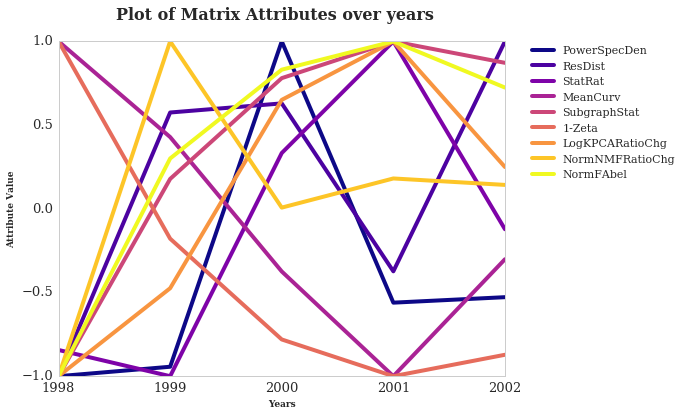

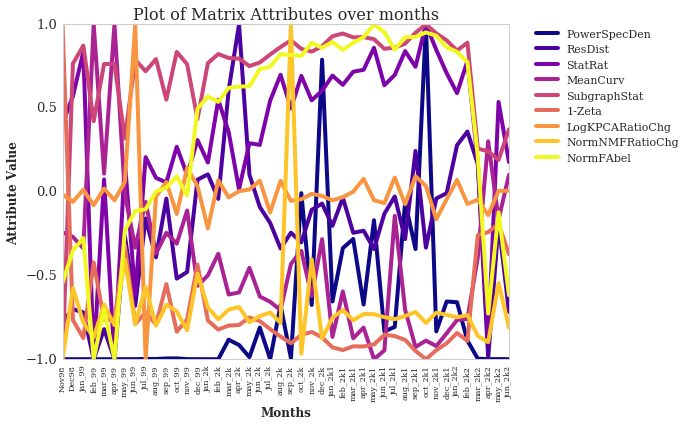

In [160]:
attvol_y.drop(['ZeroCrossRate','LogSpecCentroid'], axis=1).iloc[:,19:].plot.line(use_index=True, cmap='plasma',figsize=(8,6))
plt.xlabel("Years")
plt.ylabel("Attribute Value")
plt.legend(fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(years)),years,fontsize=13)
plt.yticks(fontsize=13)
plt.suptitle("Plot of Matrix Attributes over years", fontsize=16)
plt.autoscale()

attvol_m.drop(['ZeroCrossRate','LogSpecCentroid'], axis=1).iloc[:,19:].plot.line(use_index=True,cmap='plasma', rot=90, figsize=(8,6))
plt.xlabel("Months", fontsize=12)
plt.ylabel("Attribute Value", fontsize=12)
plt.legend(fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(months)), months)
plt.yticks(fontsize=13)
plt.title("Plot of Matrix Attributes over months", fontsize=16)
plt.autoscale()

In [56]:
all_cols = list(attvol_m.columns)

In [57]:
attvol_y.shape

(5, 30)

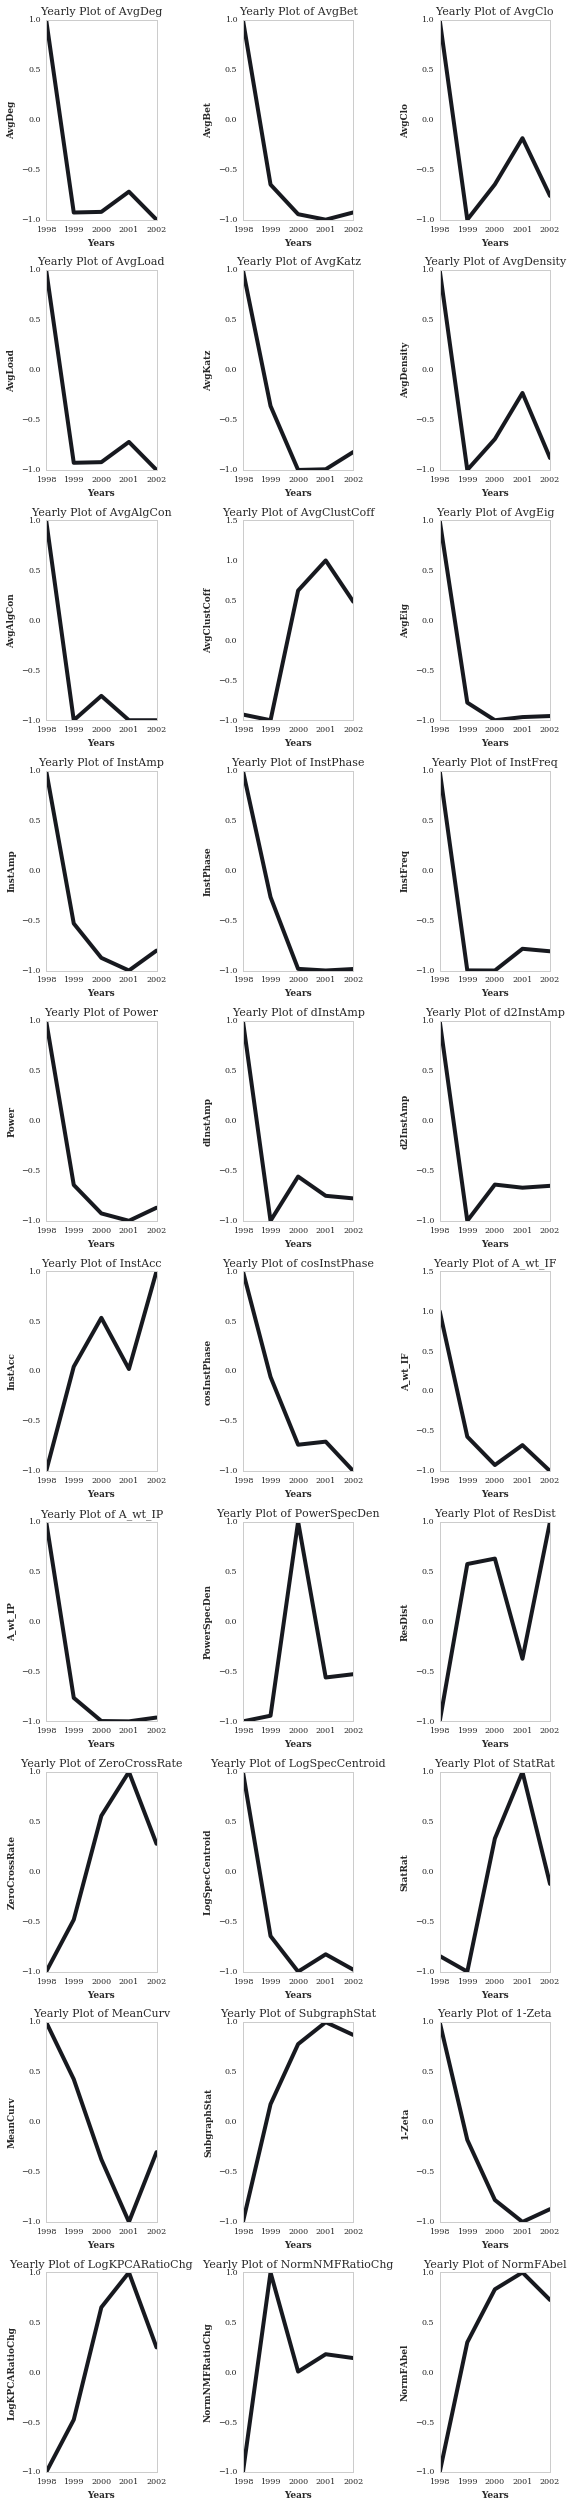

In [162]:
plt.figure(figsize=(8,38))

for i in range(len(all_cols)):
    plt.subplot(11,3,i+1)
    attvol_y.iloc[:,i].plot.line(use_index=True)
    plt.xlabel("Years")
    plt.ylabel(all_cols[i])
    plt.xticks(np.arange(len(years)), years)
    plt.title("Yearly Plot of " +all_cols[i],fontsize=11)
    plt.tight_layout()
plt.savefig('images/avg_allatt_yrs.png')

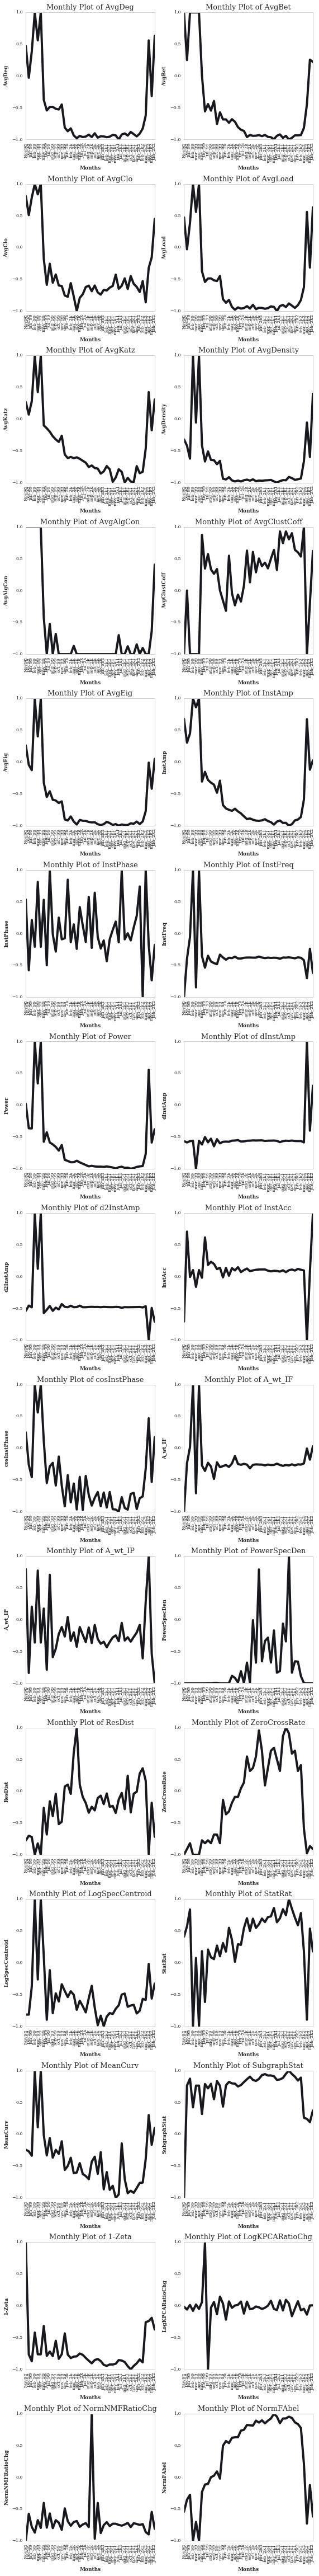

In [163]:
plt.figure(figsize=(8,64))

for i in range(len(all_cols)):
    plt.subplot(15,2,i+1)
    attvol_m.iloc[:,i].plot.line(rot=90)
    plt.xlabel("Months")
    plt.ylabel(all_cols[i])
    plt.xticks(np.arange(len(months)), months)
    plt.title("Monthly Plot of " +all_cols[i],fontsize=13)
    plt.tight_layout()
plt.savefig('images/avg_allatt_mth.png')

# Correlation Analysis

In [165]:
corr_m = attvol_m.corr()
g = sns.clustermap(corr_m, metric='chebyshev')
plt.close()

## Correlation > 0.7

In [166]:
threshold = 0.7
corr_m.values[np.where(abs(corr_m.values) < threshold)] = 0

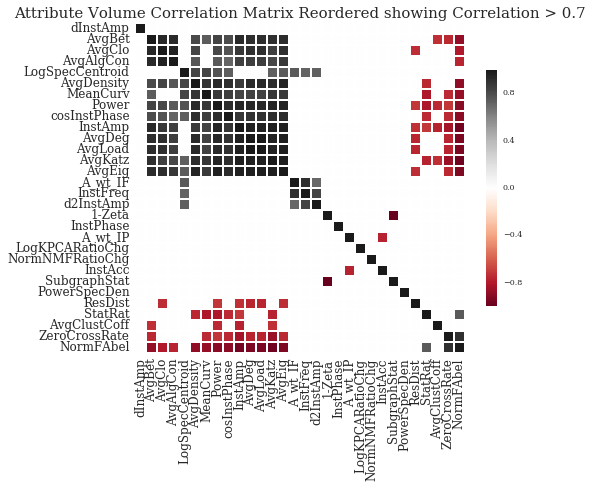

In [167]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_m.iloc[g.dendrogram_col.reordered_ind, g.dendrogram_row.reordered_ind],\
            cmap='RdGy',robust=True, fmt='d', linewidths=1, square=True,\
            cbar_kws={'orientation':'vertical', 'shrink':0.5})
plt.title("Attribute Volume Correlation Matrix Reordered showing Correlation > 0.7", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=360, fontsize=12)
plt.tight_layout()
plt.savefig('images/reordered_corrmat.png')

In [169]:
names = corr_m.index.values
G_corr = nx.Graph(corr_m.values)
pos=nx.fruchterman_reingold_layout(G_corr, iterations=1000, k=200)

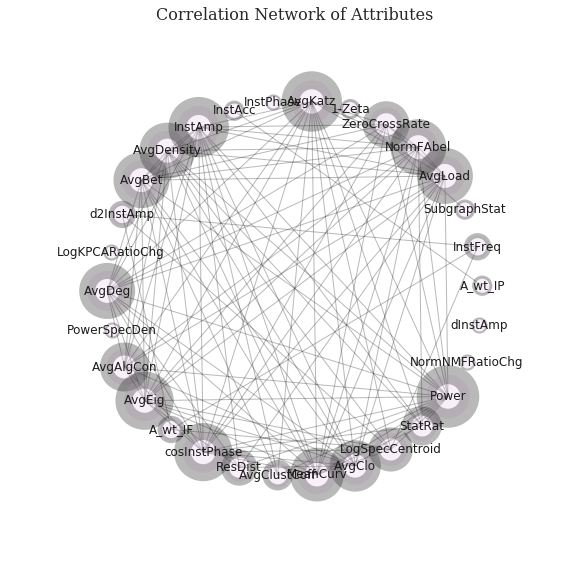

In [172]:
#ref: https://github.com/traims/correlation-based-networks/blob/master/cnetwork.ipynb
components = nx.connected_components(G_corr)
plt.figure(figsize=(8,8))
plt.title("Correlation Network of Attributes", fontsize=16)
plt.axis('off')
for i in components:
    component = G_corr.subgraph(i)
    nx.draw_networkx(component, with_labels = True,node_size = [component.degree(i)*100 for i in component.nodes()],\
        labels = dict([(x, names[x]) for x in component.nodes()]), pos=pos, font_size=12, alpha=0.3,\
                    edge_color='k', node_color='#E9CFEC', linewidths=[component.degree(i) for i in component.nodes()],\
                     fontsize=11)
plt.tight_layout()
plt.savefig('images/corrnet.png')

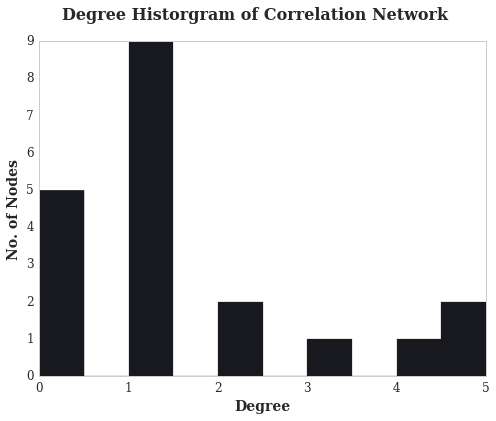

In [173]:
plt.hist(nx.degree_histogram(G_corr))
plt.suptitle("Degree Historgram of Correlation Network", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("No. of Nodes", fontsize=14)
plt.savefig('images/corrnet_deghist.png')

# Regression Analysis for Feature Ranking

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn import ensemble

In [67]:
def RMS(x, axis=None):
    rms = np.sqrt(np.mean(np.square(x), axis=axis))
    return rms

In [68]:
X= attvol_m.drop(['AvgDeg'],axis=1)
y = attvol_m.AvgDeg

In [70]:
X[:5]

AvgBet    AvgClo   AvgLoad   AvgKatz  AvgDensity  AvgAlgCon  \
0  1.000000  0.810523  0.475524  0.267944   -0.318532        1.0   
1  0.250903  0.509903 -0.027972  0.069435   -0.419219        1.0   
2  1.000000  0.785809  0.388112  0.282044   -0.622808        1.0   
3  1.000000  1.000000  1.000000  1.000000    1.000000        1.0   
4  1.000000  0.835787  0.559441  0.423789   -0.054825        1.0   

   AvgClustCoff    AvgEig   InstAmp  InstPhase    ...       ResDist  \
0     -1.000000  0.262262  0.679834   0.535455    ...     -0.774637   
1     -0.000165 -0.044277  0.305093  -0.578269    ...     -0.701077   
2     -1.000000 -0.127135  0.450396   0.214700    ...     -0.720470   
3     -1.000000  1.000000  1.000000  -0.207114    ...     -1.000000   
4     -1.000000  0.403511  0.860240   0.812100    ...     -0.820587   

   ZeroCrossRate  LogSpecCentroid   StatRat  MeanCurv  SubgraphStat    1-Zeta  \
0      -1.000000        -0.815713  0.407864 -0.242635     -1.000000  1.000000   
1      -0.909091        -0.816057  0.570795 -0.269438      0.766117 -0.766117   
2      -0.818182        -0.371199  0.836955 -0.337965      0.873376 -0.873376   
3      -1.000000         1.000000 -1.000000  1.000000      0.421859 -0.421859   
4      -1.000000        -0.264125  0.074177  0.108395      0.763599 -0.763599   

   LogKPCARatioChg  NormNMFRatioChg  NormFAbel  
0        -0.015620        -1.000000  -0.543745  
1        -0.059551        -0.573875  -0.352246  
2         0.012093        -0.780922  -0.276008  
3        -0.079774        -0.869723  -1.000000  
4         0.019315        -0.673657  -0.702049  

[5 rows x 29 columns]

In [71]:
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.5)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [72]:
params = {'n_estimators': 10, 'max_depth': 10, 'min_samples_split': 10,
          'learning_rate': 0.1, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=10, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

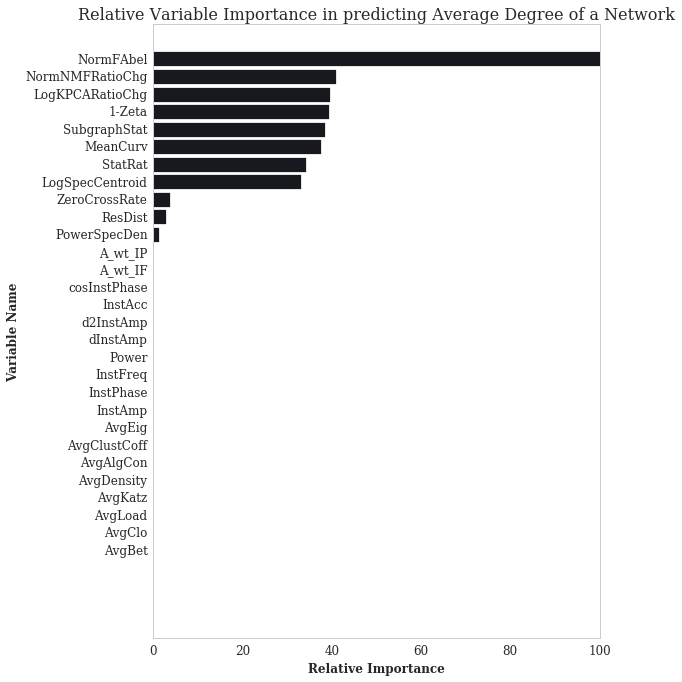

In [174]:
feature_importance = clf.feature_importances_

# make importances relative to max importance
plt.figure(figsize=(8,11))
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X)
pos = np.arange(sorted_idx.shape[0])
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names, fontsize=12)
plt.ylabel("Variable Name", fontsize=12)
plt.xlabel('Relative Importance', fontsize=12)
plt.title('Relative Variable Importance in predicting Average Degree of a Network', fontsize=16)
plt.xticks(fontsize=12)
plt.savefig('images/feature_ranking.png')

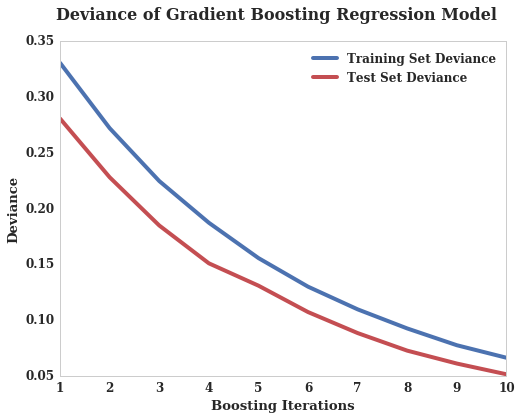

In [74]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.suptitle('Deviance of Gradient Boosting Regression Model',fontsize=16)
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc=1, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.savefig('images/reg_deviance.png')

In [75]:
mse = mean_squared_error(y_test, clf.predict(X_test))
print("Gradient Boosting MSE: " ,mse)

Gradient Boosting MSE:  0.0517054046745


# Aggregation Measures

In [77]:
persistence_m = attvol_m.mean(axis=1)/(attvol_m.shape[0]-1)
persistence_y = attvol_y.mean(axis=1)/(attvol_y.shape[0]-1)

In [78]:
def emergence(per):
    tmp = np.asarray(per)
    emerg = []
    for i in range(len(tmp)-1):
        x= int(i)
        y = x +1
        #print(tmp[y], tmp[x])
        if tmp[y]==tmp[x]:
            emerg.append(0)
        elif tmp[y] < (0) or tmp[x] < 0:
            res = (tmp[y]-tmp[x])/(abs(tmp[y])+abs(tmp[x]))
            emerg.append(res)
        else:
            res = (tmp[y]-tmp[x])/max([tmp[y],tmp[x]])
            emerg.append(res)
    tmp2 = np.zeros(len(emerg)+1)
    tmp2[1:] = emerg
    
    return tmp2
            

def NRMS(n):
    nrms = []
    for i in range(len(n)-1):
        x= int(i)
        y = x +1
        a = n[x]
        b = n[y]
        nrms_ = np.divide((RMS(a-b)),(RMS(a)+RMS(b)))
        nrms.append(nrms_)
    tmp2 = np.zeros(len(nrms)+1)
    tmp2[1:] = nrms
    
    return tmp2

In [79]:
rms_m = attvol_m.apply(lambda x: RMS(x), axis=1)
nrms_m = NRMS(rms_m)
emerg_m = emergence(persistence_m)

In [80]:
emerg_y = emergence(persistence_y)

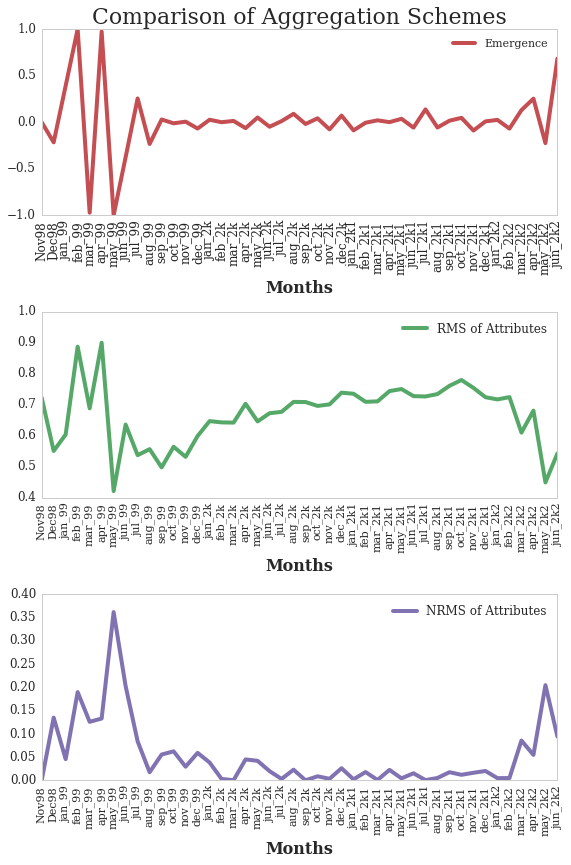

In [181]:
plt.figure(figsize=(8,11))

plt.subplot(3,1,1)
plt.plot(emerg_m,'r', label='Emergence')
plt.xticks(np.arange(len(months)), months,fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('Months', fontsize=16)
plt.legend(fontsize=11, loc=1)
plt.tight_layout()
plt.title("Comparison of Aggregation Schemes", fontsize=22)
plt.autoscale()

plt.subplot(3,1,2)
plt.plot(rms_m,'g',label='RMS of Attributes',)
plt.yticks(fontsize=12)
plt.xticks(np.arange(len(months)), months,fontsize=11, rotation=90)
plt.xlabel('Months', fontsize=16)
plt.legend(fontsize=12, loc=1)
plt.tight_layout()
plt.autoscale()

plt.subplot(3,1,3)
plt.plot(nrms_m,'m',label='NRMS of Attributes')

plt.xticks(np.arange(len(months)), months,fontsize=11, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('Months', fontsize=16)
plt.legend(fontsize=12, loc=1)
plt.autoscale()
plt.savefig('images/agg_comp.png')

In [82]:
final_attvol_m = attvol_m.copy()

final_attvol_m['NRMS'] = nrms_m
final_attvol_m['RMS']=rms_m
final_attvol_m['Emergence'] =emerg_m

# MDS and TSNE

In [83]:
from sklearn.manifold import *

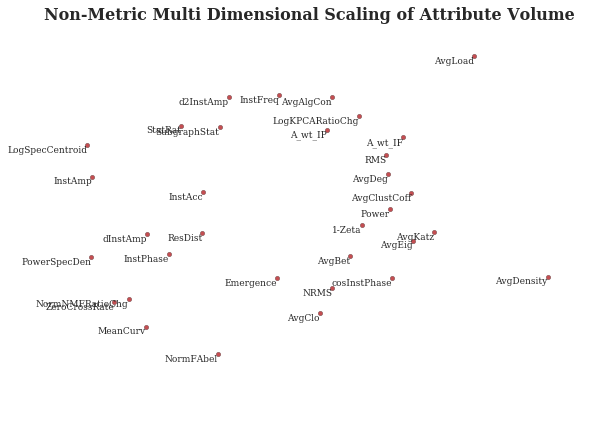

In [184]:
mds = MDS(n_components=2, metric=False, random_state=0)
Y = mds.fit_transform(final_attvol_m)

plt.axis('off')
plt.suptitle("Non-Metric Multi Dimensional Scaling of Attribute Volume", fontsize=16)
for i, txt in enumerate(final_attvol_m.columns):
    plt.scatter(Y[:, 1][i],Y[:, 0][i], c='r')
    plt.annotate(txt, (Y[:, 1][i],Y[:, 0][i]), horizontalalignment='right', verticalalignment='top')

plt.autoscale()  
plt.tight_layout()
plt.savefig('images/mds_plot.png')

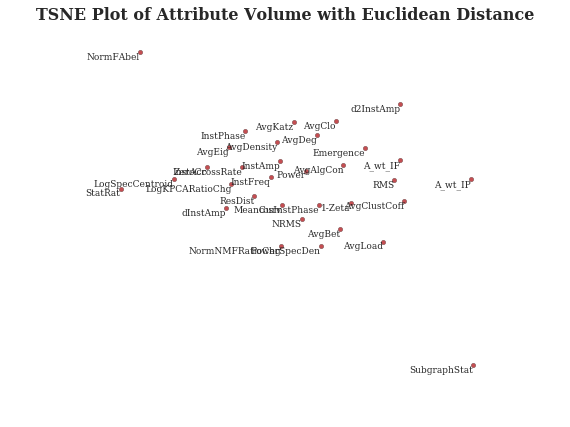

In [185]:
tsne = TSNE(metric='euclidean', random_state=0)

y_tsne = tsne.fit_transform(final_attvol_m)

plt.axis('off')
plt.suptitle("TSNE Plot of Attribute Volume with Euclidean Distance", fontsize=16)
for i, txt in enumerate(final_attvol_m.columns):
    plt.scatter(y_tsne[:, 1][i],y_tsne[:, 0][i], c='r')
    plt.annotate(txt, (y_tsne[:, 1][i],y_tsne[:, 0][i]), horizontalalignment='right', verticalalignment='top')

plt.autoscale()  
plt.tight_layout()
plt.savefig('images/tsne_plot_euc.png')

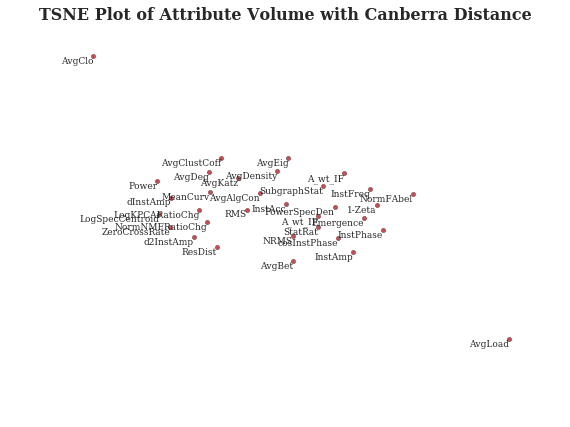

In [186]:
tsne = TSNE(metric='canberra', random_state=0)

y_tsne = tsne.fit_transform(final_attvol_m)
plt.axis('off')
plt.suptitle("TSNE Plot of Attribute Volume with Canberra Distance", fontsize=16)
for i, txt in enumerate(final_attvol_m.columns):
    plt.scatter(y_tsne[:, 1][i],y_tsne[:, 0][i], c='r')
    plt.annotate(txt, (y_tsne[:, 1][i],y_tsne[:, 0][i]), horizontalalignment='right', verticalalignment='top')

plt.autoscale()  
plt.tight_layout()
plt.savefig('images/tsne_plot.png')

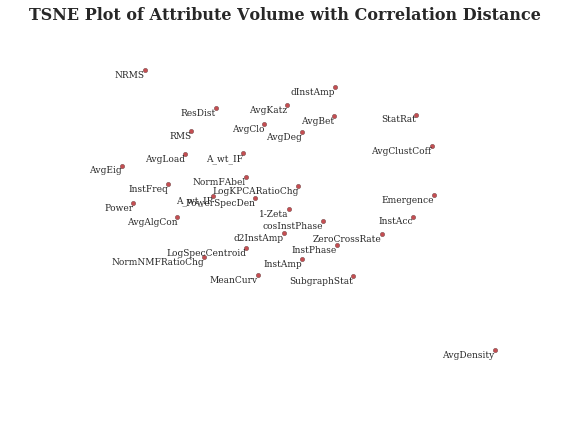

In [187]:
tsne = TSNE(metric='correlation', random_state=0)

y_tsne = tsne.fit_transform(final_attvol_m)

plt.axis('off')
plt.suptitle("TSNE Plot of Attribute Volume with Correlation Distance", fontsize=16)
for i, txt in enumerate(final_attvol_m.columns):
    plt.scatter(y_tsne[:, 1][i],y_tsne[:, 0][i], c='r')
    plt.annotate(txt, (y_tsne[:, 1][i],y_tsne[:, 0][i]), horizontalalignment='right', verticalalignment='top')

plt.autoscale()  
plt.tight_layout()
plt.savefig('images/tsne_plot_corr.png')

# FK and Radon Plot

In [191]:
def radon(m):
    from skimage.transform import radon
    theta = np.linspace(0., 180., max(m.shape), endpoint=False)
    sinogram = radon(m, theta=theta, circle=True)    
    return sinogram

In [232]:
def fk_plot(f):
    freq = sc.fft(f)
    wavnum = 1/freq

    return [freq, wavnum]

/home/arshad/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/home/arshad/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


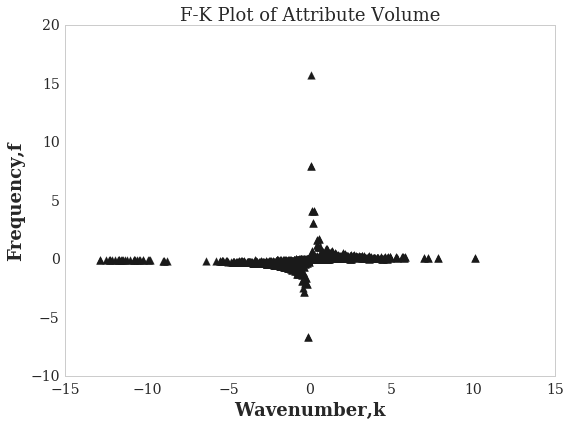

In [234]:
f,k, = fk_plot(final_attvol_m)
plt.scatter(f,k, s=60, marker='^', c='k')
plt.title("F-K Plot of Attribute Volume", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Wavenumber,k", fontsize=18)
plt.ylabel("Frequency,f", fontsize=18)
plt.savefig('images/fkplot.png')

In [192]:
sgram = radon(final_attvol_m.values)

/home/arshad/anaconda3/lib/python3.5/site-packages/skimage/transform/radon_transform.py:66: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


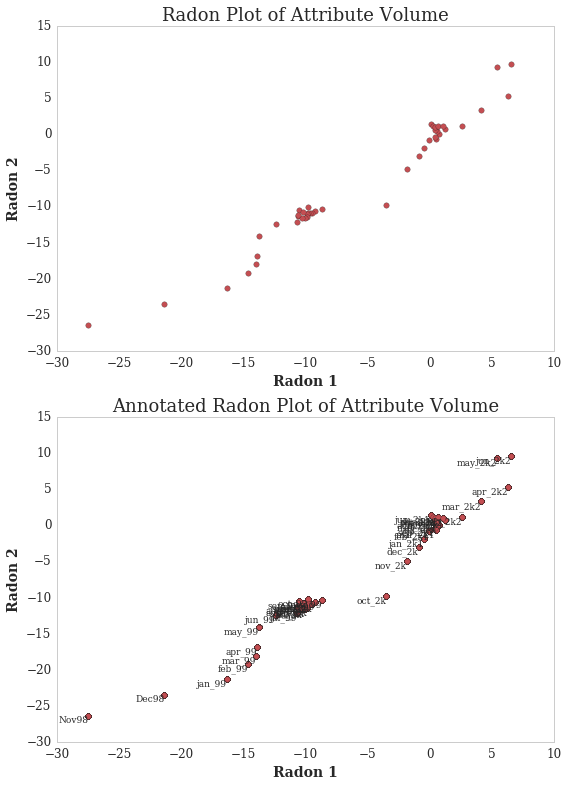

In [190]:
plt.figure(figsize=(8,11))

plt.subplot(211)
plt.scatter(sgram[0],sgram[1], c='r', s=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Radon 1", fontsize=14)
plt.ylabel("Radon 2", fontsize=14)
plt.title("Radon Plot of Attribute Volume", fontsize=18)
plt.tight_layout()

plt.subplot(212)
plt.title("Annotated Radon Plot of Attribute Volume", fontsize=18)
for i, txt in enumerate(months):
    plt.scatter(sgram[0],sgram[1], c='r', s=30)
    plt.annotate(txt, (sgram[0][i],sgram[1][i]), horizontalalignment='right', verticalalignment='top')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Radon 1", fontsize=14)
plt.ylabel("Radon 2", fontsize=14)
plt.tight_layout()
plt.savefig('images/radonplot.png')

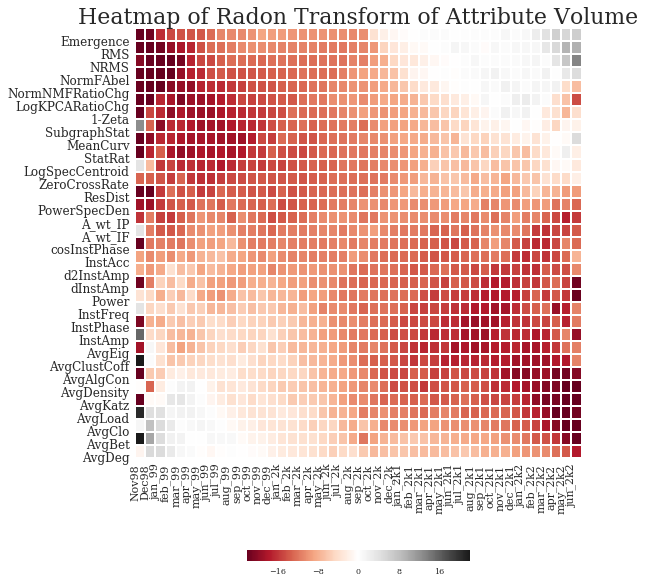

In [194]:
plt.figure(figsize=(8,11))
sns.heatmap(sgram, cmap='RdGy', robust=True,cbar_kws={'orientation':'horizontal', 'shrink':0.5}, linewidths=1)
plt.xticks(np.arange(len(months)), months,fontsize=11, rotation=90);
plt.yticks(np.arange(len(final_attvol_m.columns)), final_attvol_m.columns,fontsize=12, rotation=360);
plt.title("Heatmap of Radon Transform of Attribute Volume", fontsize=16)
plt.savefig('images/radon_heat.png')



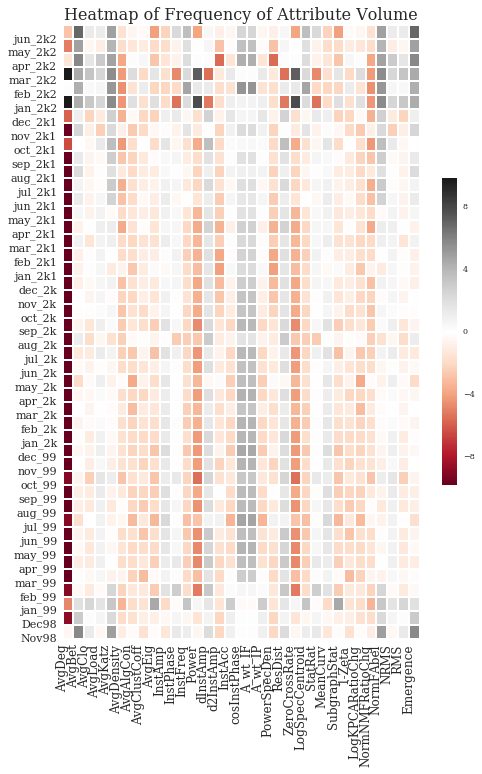

In [197]:
plt.figure(figsize=(8,11))
sns.heatmap(np.real(f), cmap='RdGy', robust=True,cbar_kws={'orientation':'vertical', 'shrink':0.5}, linewidths=1)
plt.yticks(np.arange(len(months)), months,fontsize=11, rotation=360);
plt.xticks(np.arange(len(final_attvol_m.columns)), final_attvol_m.columns,fontsize=12, rotation=90);
plt.title("Heatmap of Frequency of Attribute Volume", fontsize=16)
plt.savefig('images/freq_heat.png')

/home/arshad/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:3095: ComplexWarning: Casting complex values to real discards the imaginary part
  output = self._data.astype(newtype).view(type(self))


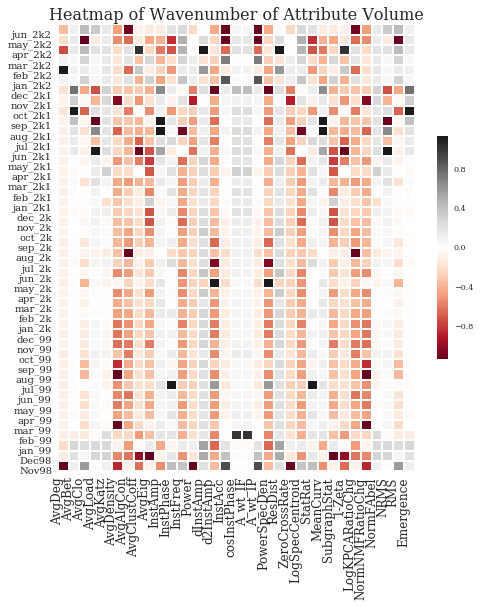

In [201]:
plt.figure(figsize=(8,8))
sns.heatmap(k, cmap='RdGy', robust=True,cbar_kws={'orientation':'vertical', 'shrink':0.5}, linewidths=1)
plt.yticks(np.arange(len(months)), months,fontsize=10, rotation=360);
plt.xticks(np.arange(len(final_attvol_m.columns)), final_attvol_m.columns,fontsize=12, rotation=90);
plt.title("Heatmap of Wavenumber of Attribute Volume", fontsize=16)
plt.savefig('images/wavnum_heat.png')

# Exotic Transforms



In [96]:
fabel = abel.Transform(final_attvol_m.values, direction='forward', method='direct').transform

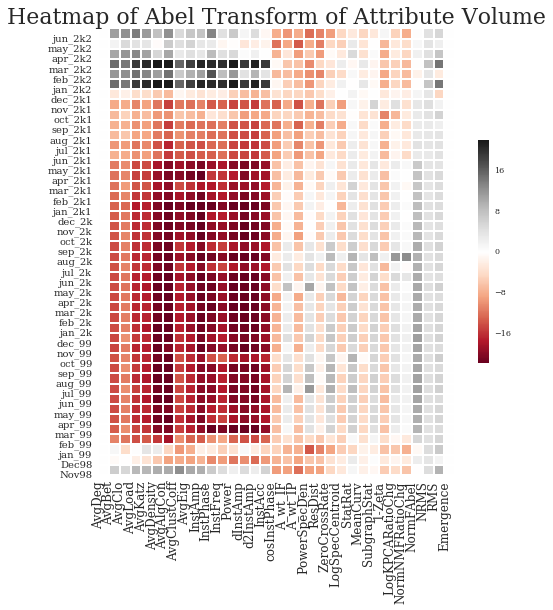

In [199]:
plt.figure(figsize=(8,8))
sns.heatmap(fabel, cmap='RdGy', robust=True,cbar_kws={'orientation':'vertical', 'shrink':0.5}, linewidths=1)
plt.yticks(np.arange(len(months)), months,fontsize=10, rotation=360);
plt.xticks(np.arange(len(final_attvol_m.columns)), final_attvol_m.columns,fontsize=12, rotation=90);
plt.title("Heatmap of Abel Transform of Attribute Volume", fontsize=16)

In [98]:
H = sc.fftpack.fft2(fabel)

/home/arshad/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:3095: ComplexWarning: Casting complex values to real discards the imaginary part
  output = self._data.astype(newtype).view(type(self))


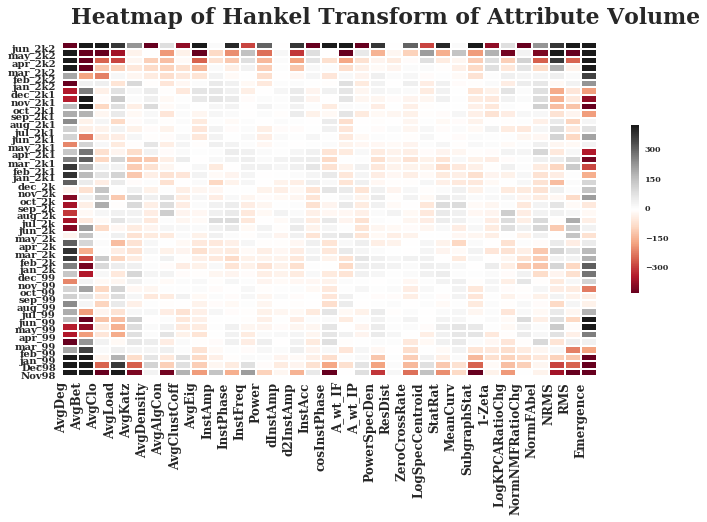

In [99]:
sns.heatmap(H, cmap='RdGy', robust=True,cbar_kws={'orientation':'vertical', 'shrink':0.5}, linewidths=1)
plt.yticks(np.arange(len(months)), months,fontsize=10, rotation=360);
plt.xticks(np.arange(len(final_attvol_m.columns)), final_attvol_m.columns,fontsize=12, rotation=90);
plt.suptitle("Heatmap of Hankel Transform of Attribute Volume", fontsize=22)

# Which nodes are common to all years?

In [100]:
int_0 = np.intersect1d(Gt0.nodes(), Gt1.nodes())
int_1 = np.intersect1d(int_0, Gt2.nodes())
int_2 = np.intersect1d(int_1, Gt3.nodes())
int_all = np.intersect1d(int_2, Gt4.nodes())
int_all

array([ 38, 110, 123, 155, 169])

In [101]:
def get_cent(net):
    degC = nx.degree_centrality(net)
    cloC = nx.closeness_centrality(net)
    betC = nx.betweenness_centrality(net)
    eigC = nx.eigenvector_centrality_numpy(net)
    katzC = nx.katz_centrality_numpy(net)
    loadC = nx.load_centrality(net)
        
    return [degC,cloC,betC,eigC,katzC, loadC]

In [102]:
degC0, cloC0, betC0, eigC0,  katzC0, loadC0 = get_cent(Gt0)
degC1, cloC1, betC1, eigC1,  katzC1, loadC1 = get_cent(Gt1)
degC2, cloC2, betC2, eigC2,  katzC2, loadC2 = get_cent(Gt2)
degC3, cloC3, betC3, eigC3,  katzC3, loadC3 = get_cent(Gt3)
degC4, cloC4, betC4, eigC4,  katzC4, loadC4 = get_cent(Gt4)

/home/arshad/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


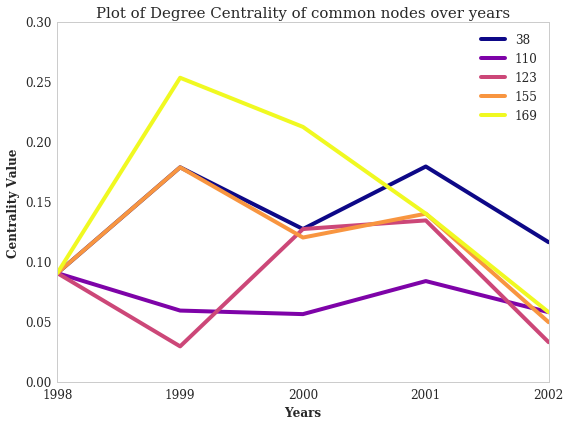

In [236]:
node_deg = pd.DataFrame.from_dict(degC0, orient='index').\
join(pd.DataFrame.from_dict(degC1,orient='index'), rsuffix = 'Gt1', lsuffix='Gt0', how='right').\
join(pd.DataFrame.from_dict(degC2,orient='index'), rsuffix = 'Gt2', lsuffix='Gt1',how='right').\
join(pd.DataFrame.from_dict(degC3,orient='index'), rsuffix = 'Gt3', lsuffix='Gt2',how='right').\
join(pd.DataFrame.from_dict(degC4,orient='index'), rsuffix = 'Gt4', lsuffix='Gt3',how='right').dropna().T

node_deg = node_deg.T
node_deg.columns = years
node_deg = node_deg.T

node_deg.plot.line(figsize=(8,6), cmap='plasma')
plt.title("Plot of Degree Centrality of common nodes over years", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Centrality Value", fontsize=12)
plt.legend(fontsize=12, loc=1)
plt.xticks(years,[i for i in years],fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('images/node_deg.png')

/home/arshad/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


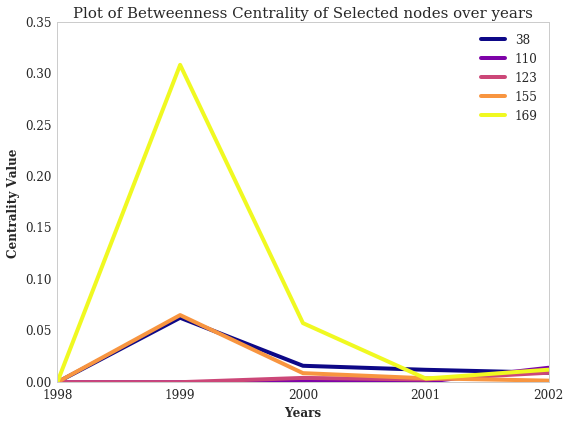

In [237]:
node_bet = pd.DataFrame.from_dict(betC0, orient='index').\
join(pd.DataFrame.from_dict(betC1,orient='index'), rsuffix = 'Gt1', lsuffix='Gt0', how='right').\
join(pd.DataFrame.from_dict(betC2,orient='index'), rsuffix = 'Gt2', lsuffix='Gt1',how='right').\
join(pd.DataFrame.from_dict(betC3,orient='index'), rsuffix = 'Gt3', lsuffix='Gt2',how='right').\
join(pd.DataFrame.from_dict(betC4,orient='index'), rsuffix = 'Gt4', lsuffix='Gt3',how='right').dropna().T
node_bet = node_bet.T
node_bet.columns = years
node_bet = node_bet.T
node_bet.plot(cmap='plasma')
plt.title("Plot of Betweenness Centrality of Selected nodes over years", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Centrality Value", fontsize=12)
plt.legend(fontsize=12, loc=1)
plt.xticks(years,[i for i in years],fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('images/node_bet.png')

/home/arshad/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


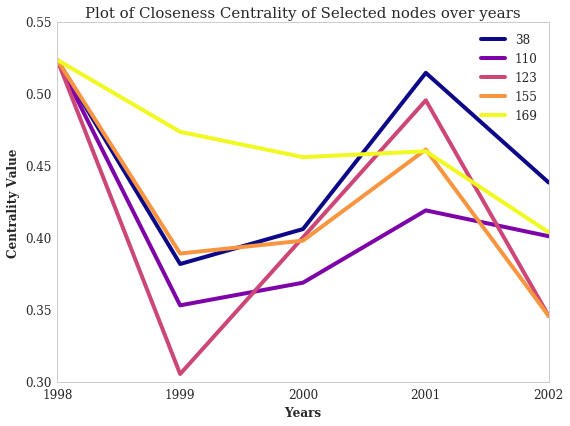

In [238]:
node_clo = pd.DataFrame.from_dict(cloC0, orient='index').\
join(pd.DataFrame.from_dict(cloC1,orient='index'), rsuffix = 'Gt1', lsuffix='Gt0', how='right').\
join(pd.DataFrame.from_dict(cloC2,orient='index'), rsuffix = 'Gt2', lsuffix='Gt1',how='right').\
join(pd.DataFrame.from_dict(cloC3,orient='index'), rsuffix = 'Gt3', lsuffix='Gt2',how='right').\
join(pd.DataFrame.from_dict(cloC4,orient='index'), rsuffix = 'Gt4', lsuffix='Gt3',how='right').dropna().T
node_clo = node_clo.T
node_clo.columns = years
node_clo = node_clo.T
node_clo.plot(figsize=(8,6), cmap='plasma')
plt.title("Plot of Closeness Centrality of Selected nodes over years", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Centrality Value", fontsize=12)
plt.legend(fontsize=12, loc=1)
plt.xticks(years,[i for i in years],fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('images/node_clo.png')

/home/arshad/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


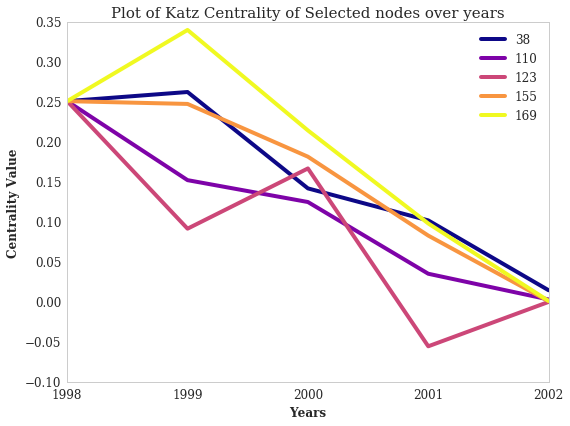

In [239]:
node_katz = pd.DataFrame.from_dict(katzC0, orient='index').\
join(pd.DataFrame.from_dict(katzC1,orient='index'), rsuffix = 'Gt1', lsuffix='Gt0', how='right').\
join(pd.DataFrame.from_dict(katzC2,orient='index'), rsuffix = 'Gt2', lsuffix='Gt1',how='right').\
join(pd.DataFrame.from_dict(katzC3,orient='index'), rsuffix = 'Gt3', lsuffix='Gt2',how='right').\
join(pd.DataFrame.from_dict(katzC4,orient='index'), rsuffix = 'Gt4', lsuffix='Gt3',how='right').dropna().T
node_katz = node_katz.T
node_katz.columns = years
node_katz = node_katz.T
node_katz.plot(figsize=(8,6), cmap='plasma')
plt.title("Plot of Katz Centrality of Selected nodes over years", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Centrality Value", fontsize=12)
plt.legend(fontsize=12, loc=1)
plt.xticks(years,[i for i in years],fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('images/node_katz.png')

/home/arshad/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


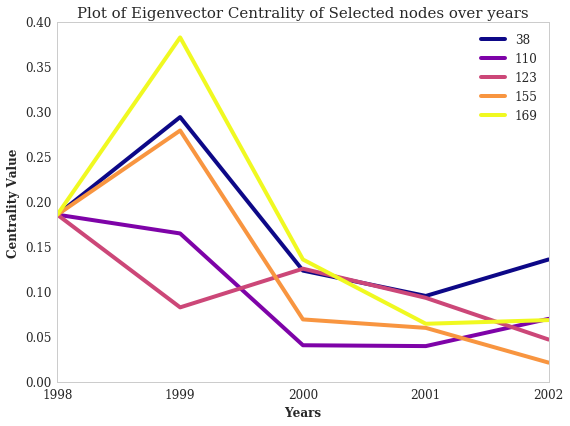

In [240]:
node_eig = pd.DataFrame.from_dict(eigC0, orient='index').\
join(pd.DataFrame.from_dict(eigC1,orient='index'), rsuffix = 'Gt1', lsuffix='Gt0', how='right').\
join(pd.DataFrame.from_dict(eigC2,orient='index'), rsuffix = 'Gt2', lsuffix='Gt1',how='right').\
join(pd.DataFrame.from_dict(eigC3,orient='index'), rsuffix = 'Gt3', lsuffix='Gt2',how='right').\
join(pd.DataFrame.from_dict(eigC4,orient='index'), rsuffix = 'Gt4', lsuffix='Gt3',how='right').dropna().T
node_eig = node_eig.T
node_eig.columns = years
node_eig = node_eig.T
node_eig.plot(figsize=(8,6), cmap='plasma')
plt.title("Plot of Eigenvector Centrality of Selected nodes over years", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Centrality Value", fontsize=12)
plt.legend(fontsize=12, loc=1)
plt.xticks(years,[i for i in years],fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('images/node_eig.png')

/home/arshad/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


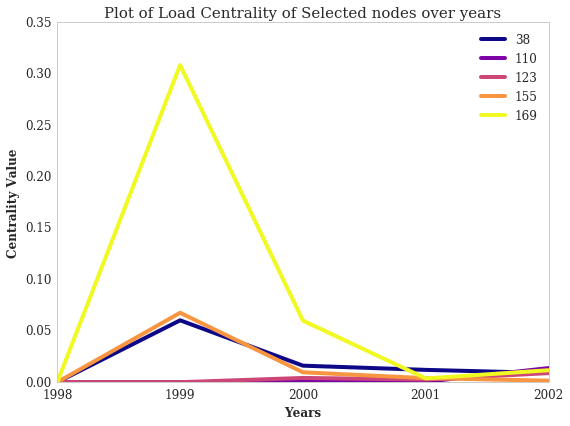

In [241]:
node_load = pd.DataFrame.from_dict(loadC0, orient='index').\
join(pd.DataFrame.from_dict(loadC1,orient='index'), rsuffix = 'Gt1', lsuffix='Gt0', how='right').\
join(pd.DataFrame.from_dict(loadC2,orient='index'), rsuffix = 'Gt2', lsuffix='Gt1',how='right').\
join(pd.DataFrame.from_dict(loadC3,orient='index'), rsuffix = 'Gt3', lsuffix='Gt2',how='right').\
join(pd.DataFrame.from_dict(loadC4,orient='index'), rsuffix = 'Gt4', lsuffix='Gt3',how='right').dropna().T
node_load = node_load.T
node_load.columns = years
node_load = node_load.T
node_load.plot(figsize=(8,6),cmap='plasma')
plt.title("Plot of Load Centrality of Selected nodes over years", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Centrality Value", fontsize=12)
plt.legend(fontsize=12, loc=1)
plt.xticks(years,[i for i in years],fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('images/node_load.png')

/home/arshad/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


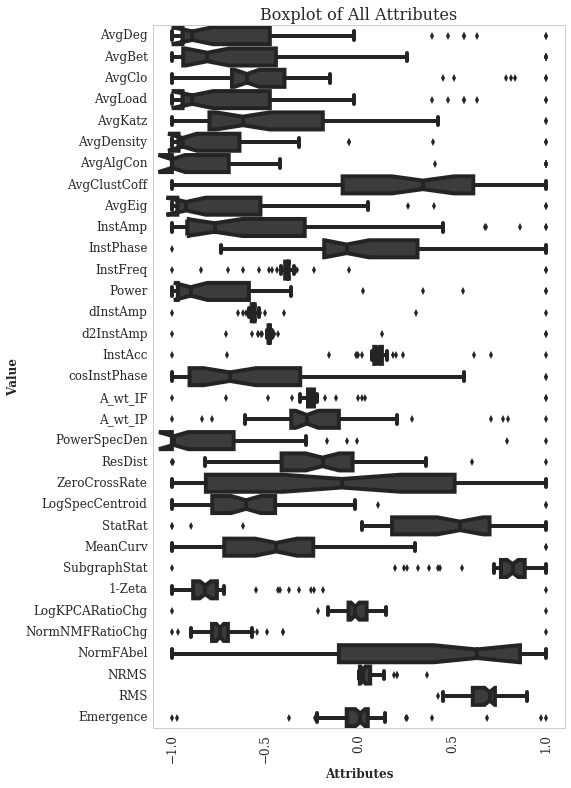

In [210]:
plt.figure(figsize=(8,11))
plt.title("Boxplot of All Attributes", fontsize=16)
sns.boxplot(final_attvol_m, orient='h', notch=True, color='#3D3C3A')
plt.xlabel('Attributes', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlim(-1.1,1.1);
plt.tight_layout()
plt.savefig("images/attvol_boxplot_all.png")